In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
7,10001901,M,NaN,A,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(33690, 80)

In [5]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
T0                              0
T1                              0
T2                              0
T3                              0
T4                              0
N0                              0
N1                              0
N2                              0
N3                              0
M1                              0
STAGE0        

In [6]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NEWVITALSTATUS               category
NUMBER_TUMOURS                  int64
C180                            int64
C181                            int64
C182                            int64
C183                            int64
C184                            int64
C185                            int64
C186                            int64
C187                            int64
C188                            int64
BEH_BENIGN                      int64
BEH_MALIG                       int64
BEH_MICINV                      int64
BEH_INSITU                      int64
BEH_UNCERT                      int64
T0                              int64
T1                              int64
T2                              int64
T3                              int64
T4                              int64
N0                              int64
N1                              int64
N2          

In [7]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    25237
1     8453
Name: DEAD, dtype: int64

In [8]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,10001901,M,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


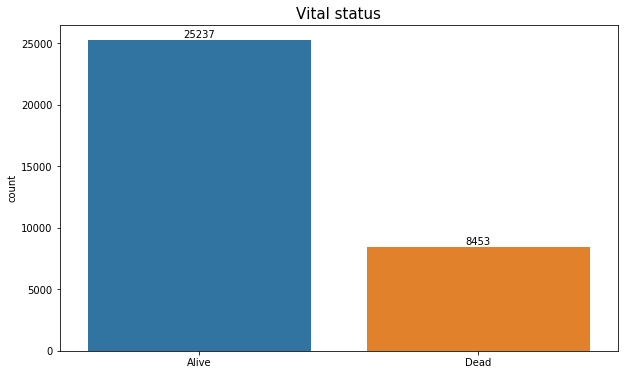

In [9]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

In [10]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 74.91
Percentage of patients classified as dead: 25.09


In [11]:
df.groupby('DEAD')['SEX'].value_counts()

DEAD  SEX
0     M      12945
      F      12292
1     M       4324
      F       4129
Name: SEX, dtype: int64

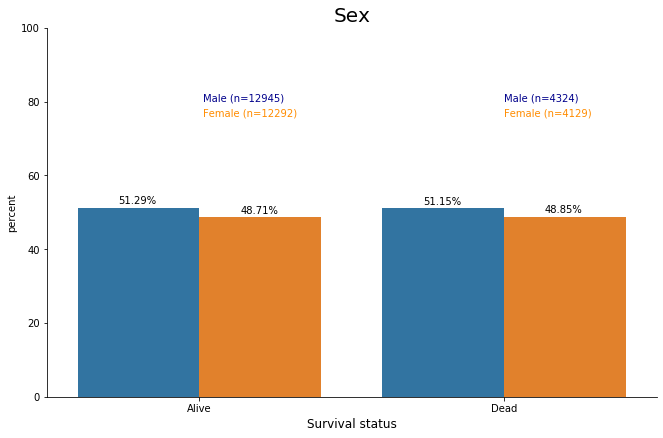

In [12]:
x, y = 'DEAD', 'SEX'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Sex', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "Male (n=12945)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "Female (n=12292)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 80, "Male (n=4324)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "Female (n=4129)", horizontalalignment='left', size='medium', color='darkorange');

In [13]:
df.groupby('DEAD')['ETHNICITY'].value_counts()

DEAD  ETHNICITY                    
0     White British                    21596
      Other white background             714
      White Irish                        268
      Other ethnic group                 203
      Asian Indian                       197
      Black Caribbean                    185
      Asian Pakistani                    105
      Other Asian background             104
      Black African                      101
      Chinese                             77
      Other black background              56
      Asian Bangladeshi                   31
      Other mixed background              27
      White and black Caribbean           14
      Mixed white and Asian               13
      Mixed white and black African        5
      White                                5
      Other                                2
1     White British                     7331
      Other white background             247
      Other ethnic group                  86
      White Irish  

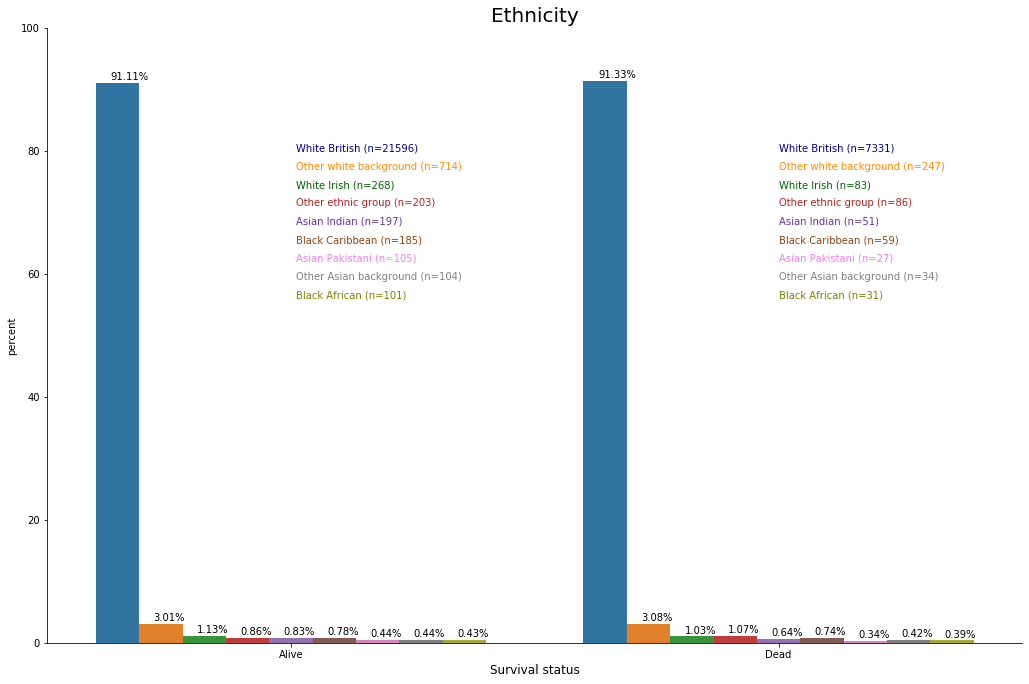

In [14]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True).iloc[[0,1,2,3,4,5,6,7,8,18,19,20,21,22,23,24,25,26]]
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Ethnicity', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(16,10)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "White British (n=21596)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 77, "Other white background (n=714)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 74, "White Irish (n=268)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.01, 71, "Other ethnic group (n=203)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.01, 68, "Asian Indian (n=197)", horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.01, 65, "Black Caribbean (n=185)", horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(0.01, 62, "Asian Pakistani (n=105)", horizontalalignment='left', size='medium', color='violet')
ax.ax.text(0.01, 59, "Other Asian background (n=104)", horizontalalignment='left', size='medium', color='grey')
ax.ax.text(0.01, 56, "Black African (n=101)", horizontalalignment='left', size='medium', color='olive')
ax.ax.text(1, 80, "White British (n=7331)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 77, "Other white background (n=247)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 74, "White Irish (n=83)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 71, "Other ethnic group (n=86)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1, 68, "Asian Indian (n=51)", horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(1, 65, "Black Caribbean (n=59)", horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(1, 62, "Asian Pakistani (n=27)", horizontalalignment='left', size='medium', color='violet')
ax.ax.text(1, 59, "Other Asian background (n=34)", horizontalalignment='left', size='medium', color='grey')
ax.ax.text(1, 56, "Black African (n=31)", horizontalalignment='left', size='medium', color='olive');

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


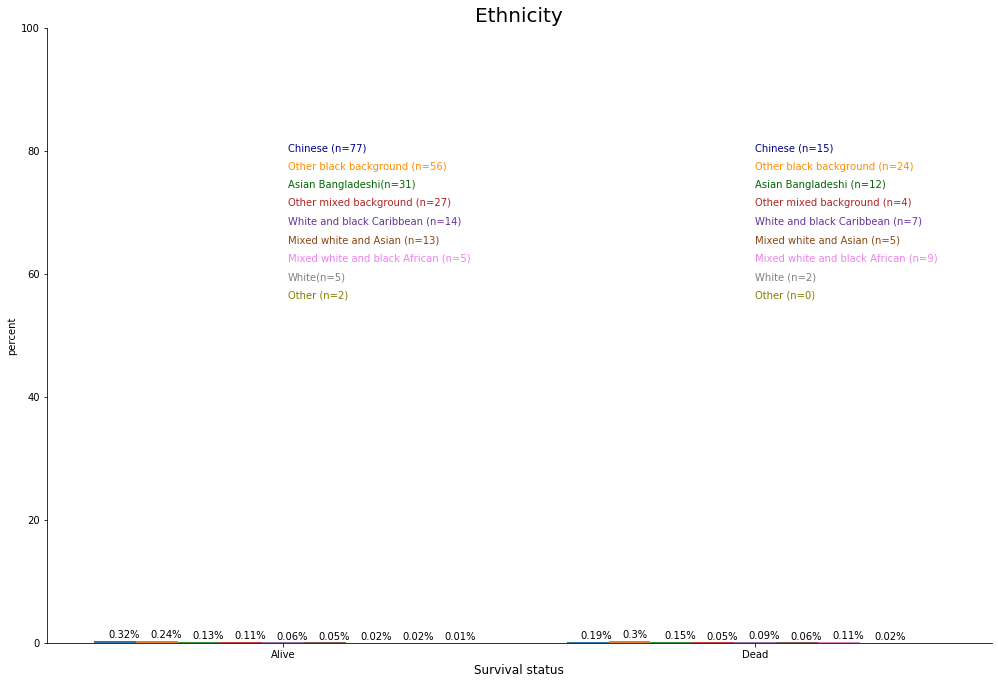

In [15]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True).iloc[[9,10,11,12,13,14,15,16,17,27,28,29,30,31,32,33,34]]
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Ethnicity', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(16,10)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "Chinese (n=77)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 77, "Other black background (n=56)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 74, "Asian Bangladeshi(n=31)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.01, 71, "Other mixed background (n=27)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(0.01, 68, "White and black Caribbean (n=14)", horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(0.01, 65, "Mixed white and Asian (n=13)", horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(0.01, 62, "Mixed white and black African (n=5)", horizontalalignment='left', size='medium', color='violet')
ax.ax.text(0.01, 59, "White(n=5)", horizontalalignment='left', size='medium', color='grey')
ax.ax.text(0.01, 56, "Other (n=2)", horizontalalignment='left', size='medium', color='olive')
ax.ax.text(1, 80, "Chinese (n=15)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 77, "Other black background (n=24)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 74, "Asian Bangladeshi (n=12)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 71, "Other mixed background (n=4)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1, 68, "White and black Caribbean (n=7)", horizontalalignment='left', size='medium', color='rebeccapurple')
ax.ax.text(1, 65, "Mixed white and Asian (n=5)", horizontalalignment='left', size='medium', color='saddlebrown')
ax.ax.text(1, 62, "Mixed white and black African (n=9)", horizontalalignment='left', size='medium', color='violet')
ax.ax.text(1, 59, "White (n=2)", horizontalalignment='left', size='medium', color='grey')
ax.ax.text(1, 56, "Other (n=0)", horizontalalignment='left', size='medium', color='olive');

In [16]:
contingency = pd.crosstab(df['DEAD'], df['ETHNICITY'])
contingency

ETHNICITY,Asian Bangladeshi,Asian Indian,Asian Pakistani,Black African,Black Caribbean,Chinese,Mixed white and Asian,Mixed white and black African,Other,Other Asian background,Other black background,Other ethnic group,Other mixed background,Other white background,White,White British,White Irish,White and black Caribbean
DEAD,,,,,,,,,,,,,,,,,,
0,31,197,105,101,185,77,13,5,2,104,56,203,27,714,5,21596,268,14
1,12,51,27,31,59,15,5,9,0,34,24,86,4,247,2,7331,83,7


In [17]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.034836270053910254


In [18]:
# white_british = df[df['ETHNICITY'] == 'White British']
# other_white_backg = df[df['ETHNICITY'] == 'Other white background']
# white_irish = df[df['ETHNICITY'] == 'White Irish']
# other_ethnic = df[df['ETHNICITY'] == 'Other ethnic group']
# asian_indian = df[df['ETHNICITY'] == 'Asian Indian']
# black_carib = df[df['ETHNICITY'] == 'Black Caribbean']
# asian_pakis = df[df['ETHNICITY'] == 'Asian Pakistani']
# other_asian = df[df['ETHNICITY'] == 'Other Asian background']
# black_afric = df[df['ETHNICITY'] == 'Black African']
# chinese = df[df['ETHNICITY'] == 'Chinese']
# other_black = df[df['ETHNICITY'] == 'Other black background']
# asian_bangl = df[df['ETHNICITY'] == 'Asian Bangladeshi']
# other_mixed = df[df['ETHNICITY'] == 'Other mixed background']
# white_black_carib = df[df['ETHNICITY'] == 'White and black Caribbean']
# mix_white_asian = df[df['ETHNICITY'] == 'Mixed white and Asian']
# mix_white_black = df[df['ETHNICITY'] == 'Mixed white and black African']
# white = df[df['ETHNICITY'] == 'White']
# other = df[df['ETHNICITY'] == 'Other']


# f, axes = plt.subplots(9, 2, figsize=(20, 70))

# #Figure 1
# x, y = 'DEAD', 'ETHNICITY'
# ax = (df.groupby(x)[y == 'White British']
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

# axes[0,0].set_title('White British', fontsize=15)
# axes[0,0].set(xticklabels=['Alive','Dead'])
# axes[0,0].set(xlabel='Survival status')
# axes[0,0].set_ylim(0,105)
# axes[0,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[0,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[0,0].text(txt_x,txt_y,txt)
    
# axes[0,0].text(0.05, 80, "False (n=80976)", horizontalalignment='left', size='medium', color='darkblue')
# axes[0,0].text(0.05, 75, "True (n=21972)", horizontalalignment='left', size='medium', color='darkorange')
# axes[0,0].text(1.05, 80, "False (n=1022)", horizontalalignment='left', size='medium', color='darkblue')
# axes[0,0].text(1.05, 75, "True (n=273)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 2
# x, y = 'DEAD', 'ETHNICITY'
# ax = (other_white_backg.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

# axes[0,1].set_title('Other white background', fontsize=15)
# axes[0,1].set(xticklabels=['Alive','Dead'])
# axes[0,1].set(xlabel='Survival status')
# axes[0,1].set_ylim(0,105)
# axes[0,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[0,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[0,1].text(txt_x,txt_y,txt)

# axes[0,1].text(0.05, 80, "False (n=86853)", horizontalalignment='left', size='medium', color='darkblue')
# axes[0,1].text(0.05, 75, "True (n=16095)", horizontalalignment='left', size='medium', color='darkorange')
# axes[0,1].text(1.05, 80, "False (n=1082)", horizontalalignment='left', size='medium', color='darkblue')
# axes[0,1].text(1.05, 75, "True (n=213)", horizontalalignment='left', size='medium', color='darkorange')


# #Figure 3
# x, y = 'DEAD', 'ETHNICITY'
# ax = (white_irish.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

# axes[1,0].set_title('White Irish', fontsize=15)
# axes[1,0].set(xticklabels=['Alive','Dead'])
# axes[1,0].set(xlabel='Survival status')
# axes[1,0].set_ylim(0,105)
# axes[1,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[1,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[1,0].text(txt_x,txt_y,txt)

# axes[1,0].text(0.05, 80, "False (n=89935)", horizontalalignment='left', size='medium', color='darkblue')
# axes[1,0].text(0.05, 75, "True (n=13013)", horizontalalignment='left', size='medium', color='darkorange')
# axes[1,0].text(1.05, 80, "False (n=1135)", horizontalalignment='left', size='medium', color='darkblue')
# axes[1,0].text(1.05, 75, "True (n=160)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 4
# x, y = 'DEAD', 'ETHNICITY'
# ax = (other_ethnic.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

# axes[1,1].set_title('Other ethnic group', fontsize=15)
# axes[1,1].set(xticklabels=['Alive','Dead'])
# axes[1,1].set(xlabel='Survival status')
# axes[1,1].set_ylim(0,105)
# axes[1,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[1,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[1,1].text(txt_x,txt_y,txt)

# axes[1,1].text(0.05, 80, "False (n=90010)", horizontalalignment='left', size='medium', color='darkblue')
# axes[1,1].text(0.05, 75, "True (n=12938)", horizontalalignment='left', size='medium', color='darkorange')
# axes[1,1].text(1.05, 80, "False (n=1118)", horizontalalignment='left', size='medium', color='darkblue')
# axes[1,1].text(1.05, 75, "True (n=177)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 5
# x, y = 'DEAD', 'ETHNICITY'
# ax = (asian_indian.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

# axes[2,0].set_title('Asian Indian', fontsize=15)
# axes[2,0].set(xticklabels=['Alive','Dead'])
# axes[2,0].set(xlabel='Survival status')
# axes[2,0].set_ylim(0,105)
# axes[2,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[2,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[2,0].text(txt_x,txt_y,txt)

# axes[2,0].text(0.05, 80, "False (n=90968)", horizontalalignment='left', size='medium', color='darkblue')
# axes[2,0].text(0.05, 75, "True (n=11980)", horizontalalignment='left', size='medium', color='darkorange')
# axes[2,0].text(1.05, 80, "False (n=1152)", horizontalalignment='left', size='medium', color='darkblue')
# axes[2,0].text(1.05, 75, "True (n=143)", horizontalalignment='left', size='medium', color='darkorange')


# #Figure 6
# x, y = 'DEAD', 'ETHNICITY'
# ax = (black_carib.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

# axes[2,1].set_title('Black Caribbean', fontsize=15)
# axes[2,1].set(xticklabels=['Alive','Dead'])
# axes[2,1].set(xlabel='Survival status')
# axes[2,1].set_ylim(0,105)
# axes[2,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[2,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[2,1].text(txt_x,txt_y,txt)

# axes[2,1].text(0.05, 80, "False (n=92022)", horizontalalignment='left', size='medium', color='darkblue')
# axes[2,1].text(0.05, 75, "True (n=10926)", horizontalalignment='left', size='medium', color='darkorange')
# axes[2,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
# axes[2,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 7
# x, y = 'DEAD', 'ETHNICITY'
# ax = (asian_pakis.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

# axes[3,0].set_title('Asian Pakistani', fontsize=15)
# axes[3,0].set(xticklabels=['Alive','Dead'])
# axes[3,0].set(xlabel='Survival status')
# axes[3,0].set_ylim(0,105)
# axes[3,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[3,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[3,0].text(txt_x,txt_y,txt)
    
# axes[3,0].text(0.05, 80, "False (n=92850)", horizontalalignment='left', size='medium', color='darkblue')
# axes[3,0].text(0.05, 75, "True (n=10098)", horizontalalignment='left', size='medium', color='darkorange')
# axes[3,0].text(1.05, 80, "False (n=1175)", horizontalalignment='left', size='medium', color='darkblue')
# axes[3,0].text(1.05, 75, "True (n=120)", horizontalalignment='left', size='medium', color='darkorange')
    

# #Figure 8
# x, y = 'DEAD', 'ETHNICITY'
# ax = (other_asian.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

# axes[3,1].set_title('Other Asian background', fontsize=15)
# axes[3,1].set(xticklabels=['Alive','Dead'])
# axes[3,1].set(xlabel='Survival status')
# axes[3,1].set_ylim(0,105)
# axes[3,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)
    
# for p in axes[3,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[3,1].text(txt_x,txt_y,txt)
    
# axes[3,1].text(0.05, 80, "False (n=97002)", horizontalalignment='left', size='medium', color='darkblue')
# axes[3,1].text(0.05, 75, "True (n=5946)", horizontalalignment='left', size='medium', color='darkorange')
# axes[3,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
# axes[3,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')  
    

# #Figure 9
# x, y = 'DEAD', 'ETHNICITY'
# ax = (black_afric.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 0]))

# axes[4,0].set_title('Black African', fontsize=15)
# axes[4,0].set(xticklabels=['Alive','Dead'])
# axes[4,0].set(xlabel='Survival status')
# axes[4,0].set_ylim(0,105)
# axes[4,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[4,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[4,0].text(txt_x,txt_y,txt)
    
# axes[4,0].text(0.05, 80, "False (n=80976)", horizontalalignment='left', size='medium', color='darkblue')
# axes[4,0].text(0.05, 75, "True (n=21972)", horizontalalignment='left', size='medium', color='darkorange')
# axes[4,0].text(1.05, 80, "False (n=1022)", horizontalalignment='left', size='medium', color='darkblue')
# axes[4,0].text(1.05, 75, "True (n=273)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 10
# x, y = 'DEAD', 'ETHNICITY'
# ax = (chinese.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 1]))

# axes[4,1].set_title('Chinese', fontsize=15)
# axes[4,1].set(xticklabels=['Alive','Dead'])
# axes[4,1].set(xlabel='Survival status')
# axes[4,1].set_ylim(0,105)
# axes[4,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[4,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[4,1].text(txt_x,txt_y,txt)

# axes[4,1].text(0.05, 80, "False (n=86853)", horizontalalignment='left', size='medium', color='darkblue')
# axes[4,1].text(0.05, 75, "True (n=16095)", horizontalalignment='left', size='medium', color='darkorange')
# axes[4,1].text(1.05, 80, "False (n=1082)", horizontalalignment='left', size='medium', color='darkblue')
# axes[4,1].text(1.05, 75, "True (n=213)", horizontalalignment='left', size='medium', color='darkorange')


# #Figure 11
# x, y = 'DEAD', 'ETHNICITY'
# ax = (other_black.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[5, 0]))

# axes[5,0].set_title('Other black background', fontsize=15)
# axes[5,0].set(xticklabels=['Alive','Dead'])
# axes[5,0].set(xlabel='Survival status')
# axes[5,0].set_ylim(0,105)
# axes[5,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[5,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[5,0].text(txt_x,txt_y,txt)

# axes[5,0].text(0.05, 80, "False (n=89935)", horizontalalignment='left', size='medium', color='darkblue')
# axes[5,0].text(0.05, 75, "True (n=13013)", horizontalalignment='left', size='medium', color='darkorange')
# axes[5,0].text(1.05, 80, "False (n=1135)", horizontalalignment='left', size='medium', color='darkblue')
# axes[5,0].text(1.05, 75, "True (n=160)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 12
# x, y = 'DEAD', 'ETHNICITY'
# ax = (asian_bangl.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[5, 1]))

# axes[5,1].set_title('Asian Bangladeshi', fontsize=15)
# axes[5,1].set(xticklabels=['Alive','Dead'])
# axes[5,1].set(xlabel='Survival status')
# axes[5,1].set_ylim(0,105)
# axes[5,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[5,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[5,1].text(txt_x,txt_y,txt)

# axes[5,1].text(0.05, 80, "False (n=90010)", horizontalalignment='left', size='medium', color='darkblue')
# axes[5,1].text(0.05, 75, "True (n=12938)", horizontalalignment='left', size='medium', color='darkorange')
# axes[5,1].text(1.05, 80, "False (n=1118)", horizontalalignment='left', size='medium', color='darkblue')
# axes[5,1].text(1.05, 75, "True (n=177)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 13
# x, y = 'DEAD', 'ETHNICITY'
# ax = (other_mixed.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[6, 0]))

# axes[6,0].set_title('Other mixed background', fontsize=15)
# axes[6,0].set(xticklabels=['Alive','Dead'])
# axes[6,0].set(xlabel='Survival status')
# axes[6,0].set_ylim(0,105)
# axes[6,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[6,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[6,0].text(txt_x,txt_y,txt)

# axes[6,0].text(0.05, 80, "False (n=90968)", horizontalalignment='left', size='medium', color='darkblue')
# axes[6,0].text(0.05, 75, "True (n=11980)", horizontalalignment='left', size='medium', color='darkorange')
# axes[6,0].text(1.05, 80, "False (n=1152)", horizontalalignment='left', size='medium', color='darkblue')
# axes[6,0].text(1.05, 75, "True (n=143)", horizontalalignment='left', size='medium', color='darkorange')


# #Figure 14
# x, y = 'DEAD', 'ETHNICITY'
# ax = (white_black_carib.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[6, 1]))

# axes[6,1].set_title('White and black Caribbean', fontsize=15)
# axes[6,1].set(xticklabels=['Alive','Dead'])
# axes[6,1].set(xlabel='Survival status')
# axes[6,1].set_ylim(0,105)
# axes[6,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[6,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[6,1].text(txt_x,txt_y,txt)

# axes[6,1].text(0.05, 80, "False (n=92022)", horizontalalignment='left', size='medium', color='darkblue')
# axes[6,1].text(0.05, 75, "True (n=10926)", horizontalalignment='left', size='medium', color='darkorange')
# axes[6,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
# axes[6,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

# #Figure 15
# x, y = 'DEAD', 'ETHNICITY'
# ax = (mix_white_asian.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[7, 0]))

# axes[7,0].set_title('Mixed white and Asian', fontsize=15)
# axes[7,0].set(xticklabels=['Alive','Dead'])
# axes[7,0].set(xlabel='Survival status')
# axes[7,0].set_ylim(0,105)
# axes[7,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[7,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[7,0].text(txt_x,txt_y,txt)
    
# axes[7,0].text(0.05, 80, "False (n=92850)", horizontalalignment='left', size='medium', color='darkblue')
# axes[7,0].text(0.05, 75, "True (n=10098)", horizontalalignment='left', size='medium', color='darkorange')
# axes[7,0].text(1.05, 80, "False (n=1175)", horizontalalignment='left', size='medium', color='darkblue')
# axes[7,0].text(1.05, 75, "True (n=120)", horizontalalignment='left', size='medium', color='darkorange')
    

# #Figure 16
# x, y = 'DEAD', 'ETHNICITY'
# ax = (mix_white_black.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[7, 1]))

# axes[7,1].set_title('Mixed white and black African', fontsize=15)
# axes[7,1].set(xticklabels=['Alive','Dead'])
# axes[7,1].set(xlabel='Survival status')
# axes[7,1].set_ylim(0,105)
# axes[7,1].get_legend().remove()
# plt.gcf().set_size_inches(10,6)
    
# for p in axes[7,1].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[7,1].text(txt_x,txt_y,txt)
    
# axes[7,1].text(0.05, 80, "False (n=97002)", horizontalalignment='left', size='medium', color='darkblue')
# axes[7,1].text(0.05, 75, "True (n=5946)", horizontalalignment='left', size='medium', color='darkorange')
# axes[7,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
# axes[7,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')     

    
# #Figure 17
# x, y = 'DEAD', 'ETHNICITY'
# ax = (white.groupby(x)[y]
#  .value_counts(normalize=True)
#  .mul(100)
#  .rename('percent')
#  .reset_index()
#  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[8, 0]))

# axes[8,0].set_title('White', fontsize=15)
# axes[8,0].set(xticklabels=['Alive','Dead'])
# axes[8,0].set(xlabel='Survival status')
# axes[8,0].set_ylim(0,105)
# axes[8,0].get_legend().remove()
# plt.gcf().set_size_inches(10,6)

# for p in axes[8,0].patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() + p.get_width() / 3
#     txt_y = p.get_height() + 1
#     axes[8,0].text(txt_x,txt_y,txt)
    
# axes[8,0].text(0.05, 80, "False (n=92850)", horizontalalignment='left', size='medium', color='darkblue')
# axes[8,0].text(0.05, 75, "True (n=10098)", horizontalalignment='left', size='medium', color='darkorange')
# axes[8,0].text(1.05, 80, "False (n=1175)", horizontalalignment='left', size='medium', color='darkblue')
# axes[8,0].text(1.05, 75, "True (n=120)", horizontalalignment='left', size='medium', color='darkorange')
    

# #Figure 18
# # x, y = 'DEAD', 'ETHNICITY'
# # ax = (other.groupby(x)[y]
# #  .value_counts(normalize=True)
# #  .mul(100)
# #  .rename('percent')
# #  .reset_index()
# #  .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[8, 1]))

# # axes[8,1].set_title('Other', fontsize=15)
# # axes[8,1].set(xticklabels=['Alive','Dead'])
# # axes[8,1].set(xlabel='Survival status')
# # axes[8,1].set_ylim(0,105)
# # axes[8,1].get_legend().remove()
# # plt.gcf().set_size_inches(10,6)
    
# # for p in axes[8,1].patches:
# #     txt = str(p.get_height().round(2)) + '%'
# #     txt_x = p.get_x() + p.get_width() / 3
# #     txt_y = p.get_height() + 1
# #     axes[3,1].text(txt_x,txt_y,txt)
    
# # axes[8,1].text(0.05, 80, "False (n=97002)", horizontalalignment='left', size='medium', color='darkblue')
# # axes[8,1].text(0.05, 75, "True (n=5946)", horizontalalignment='left', size='medium', color='darkorange')
# # axes[8,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
# # axes[8,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')  
    
# plt.close(2)
# plt.close(3)
# plt.close(4)
# plt.close(5)
# plt.close(6)
# plt.close(7)
# plt.close(8)
# plt.close(9)
# plt.close(10)
# plt.close(11)
# plt.close(12)
# plt.close(13)
# plt.close(14)
# plt.close(15)
# plt.close(16)
# plt.close(17)
# plt.close(18)
# # plt.close(19)
# plt.show()

In [19]:
df.groupby('DEAD')['NUMBER_TUMOURS'].value_counts()

DEAD  NUMBER_TUMOURS
0     1                 24628
      2                   594
      3                    15
1     1                  8416
      2                    37
Name: NUMBER_TUMOURS, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


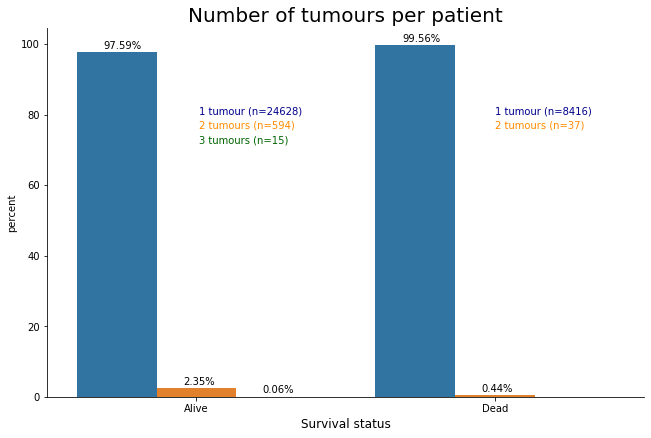

In [20]:
x, y = 'DEAD', 'NUMBER_TUMOURS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Number of tumours per patient', fontsize=20)
plt.gcf().set_size_inches(10,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "1 tumour (n=24628)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "2 tumours (n=594)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 72, "3 tumours (n=15)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 80, "1 tumour (n=8416)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "2 tumours (n=37)", horizontalalignment='left', size='medium', color='darkorange');

In [21]:
contingency = pd.crosstab(df['DEAD'], df['NUMBER_TUMOURS'])
contingency

NUMBER_TUMOURS,1,2,3
DEAD,,,
0,24628,594,15
1,8416,37,0


In [22]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

2.5845147747532525e-29


In [23]:
df.groupby('DEAD')['C180'].value_counts()

DEAD  C180
0     0       20084
      1        5153
1     0        6573
      1        1880
Name: C180, dtype: int64

In [24]:
df.groupby('DEAD')['C181'].value_counts()

DEAD  C181
0     0       24370
      1         867
1     0        8245
      1         208
Name: C181, dtype: int64

In [25]:
df.groupby('DEAD')['C182'].value_counts()

DEAD  C182
0     0       21735
      1        3502
1     0        7274
      1        1179
Name: C182, dtype: int64

In [26]:
df.groupby('DEAD')['C183'].value_counts()

DEAD  C183
0     0       24070
      1        1167
1     0        8003
      1         450
Name: C183, dtype: int64

In [27]:
df.groupby('DEAD')['C184'].value_counts()

DEAD  C184
0     0       23016
      1        2221
1     0        7730
      1         723
Name: C184, dtype: int64

In [28]:
df.groupby('DEAD')['C185'].value_counts()

DEAD  C185
0     0       24328
      1         909
1     0        8164
      1         289
Name: C185, dtype: int64

In [29]:
df.groupby('DEAD')['C186'].value_counts()

DEAD  C186
0     0       24109
      1        1128
1     0        8097
      1         356
Name: C186, dtype: int64

In [30]:
df.groupby('DEAD')['C187'].value_counts()

DEAD  C187
0     0       17182
      1        8055
1     0        6047
      1        2406
Name: C187, dtype: int64

In [31]:
df.groupby('DEAD')['C188'].value_counts()

DEAD  C188
0     0       25105
      1         132
1     0        8407
      1          46
Name: C188, dtype: int64

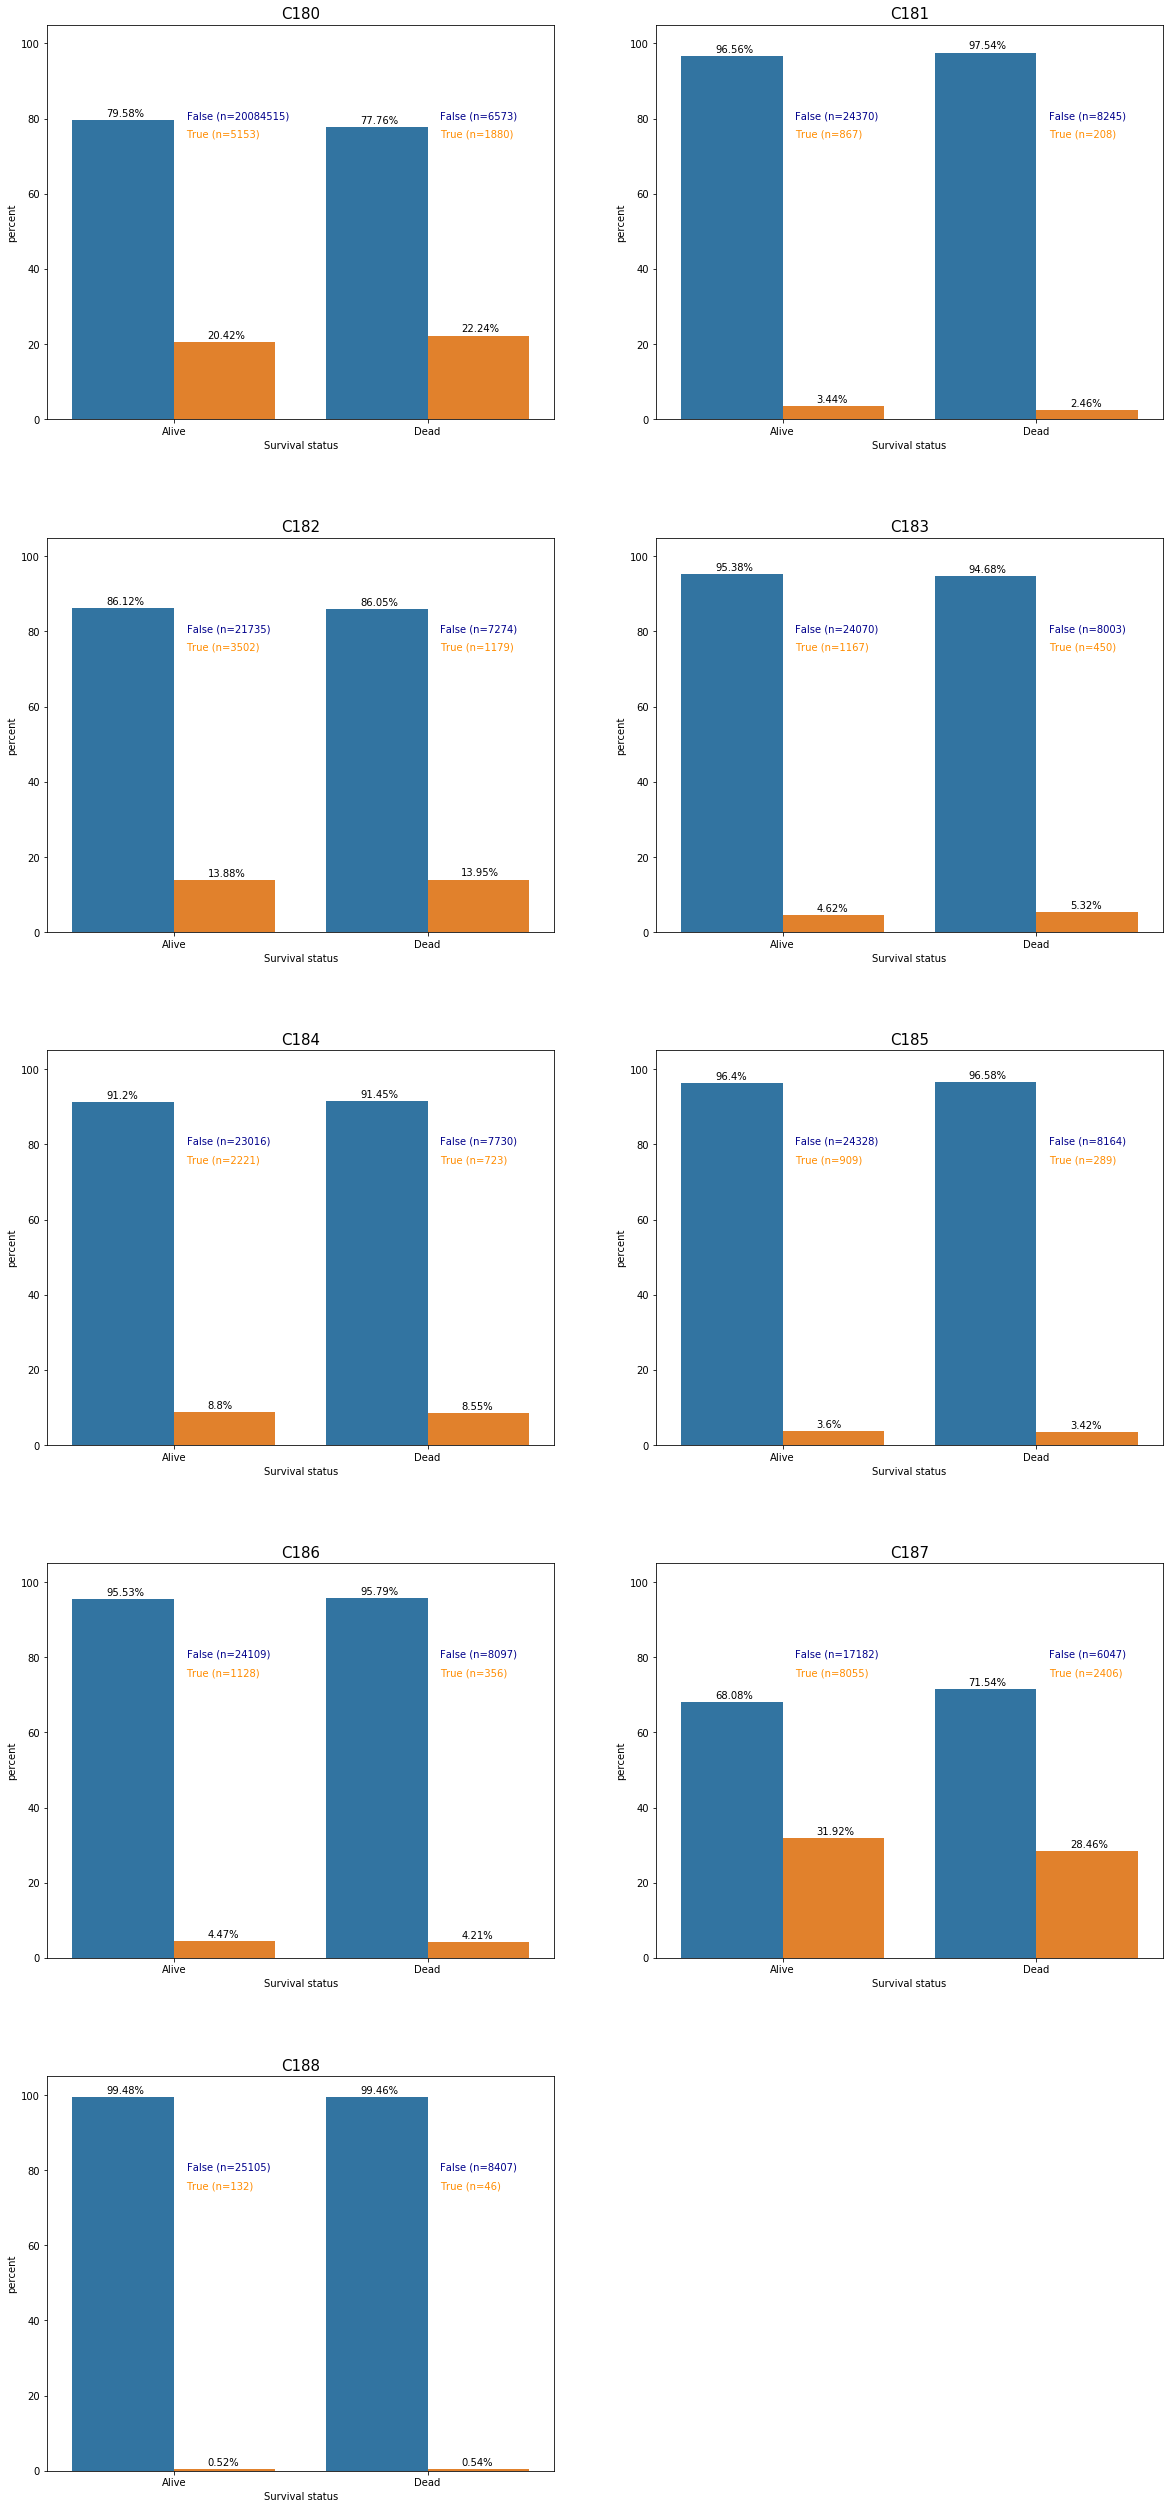

In [32]:
f, axes = plt.subplots(5, 2, figsize=(20, 45))
plt.subplots_adjust(hspace=0.3)

#Figure 1
x, y = 'DEAD', 'C180'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('C180', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=20084515)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=5153)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6573)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1880)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'C181'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('C181', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=24370)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=867)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=8245)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=208)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'C182'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('C182', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=21735)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3502)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=7274)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1179)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'C183'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('C183', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=24070)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=1167)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8003)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=450)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'C184'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('C184', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=23016)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2221)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=7730)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=723)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'C185'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('C185', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=24328)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=909)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=8164)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=289)", horizontalalignment='left', size='medium', color='darkorange')    
    
#Figure 7
x, y = 'DEAD', 'C186'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('C186', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=24109)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=1128)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=8097)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=356)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 8
x, y = 'DEAD', 'C187'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('C187', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=17182)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=8055)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=6047)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=2406)", horizontalalignment='left', size='medium', color='darkorange')    

#Figure 9
x, y = 'DEAD', 'C188'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 0]))

axes[4,0].set_title('C188', fontsize=15)
axes[4,0].set(xticklabels=['Alive','Dead'])
axes[4,0].set(xlabel='Survival status')
axes[4,0].set_ylim(0,105)
axes[4,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[4,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[4,0].text(txt_x,txt_y,txt)
    
axes[4,0].text(0.05, 80, "False (n=25105)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(0.05, 75, "True (n=132)", horizontalalignment='left', size='medium', color='darkorange')
axes[4,0].text(1.05, 80, "False (n=8407)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(1.05, 75, "True (n=46)", horizontalalignment='left', size='medium', color='darkorange')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
f.delaxes(ax = axes[4,1])
plt.show()

In [33]:
df.groupby('DEAD')['BEH_BENIGN'].value_counts()

DEAD  BEH_BENIGN
0     0             25233
      1                 4
1     0              8453
Name: BEH_BENIGN, dtype: int64

In [34]:
df.groupby('DEAD')['BEH_MALIG'].value_counts()

DEAD  BEH_MALIG
0     1            25171
      0               66
1     1             8447
      0                6
Name: BEH_MALIG, dtype: int64

In [35]:
df.groupby('DEAD')['BEH_MICINV'].value_counts()

DEAD  BEH_MICINV
0     0             25233
      1                 4
1     0              8453
Name: BEH_MICINV, dtype: int64

In [36]:
df.groupby('DEAD')['BEH_INSITU'].value_counts()

DEAD  BEH_INSITU
0     0             25195
      1                42
1     0              8452
      1                 1
Name: BEH_INSITU, dtype: int64

In [37]:
df.groupby('DEAD')['BEH_UNCERT'].value_counts()

DEAD  BEH_UNCERT
0     0             25227
      1                10
1     0              8450
      1                 3
Name: BEH_UNCERT, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


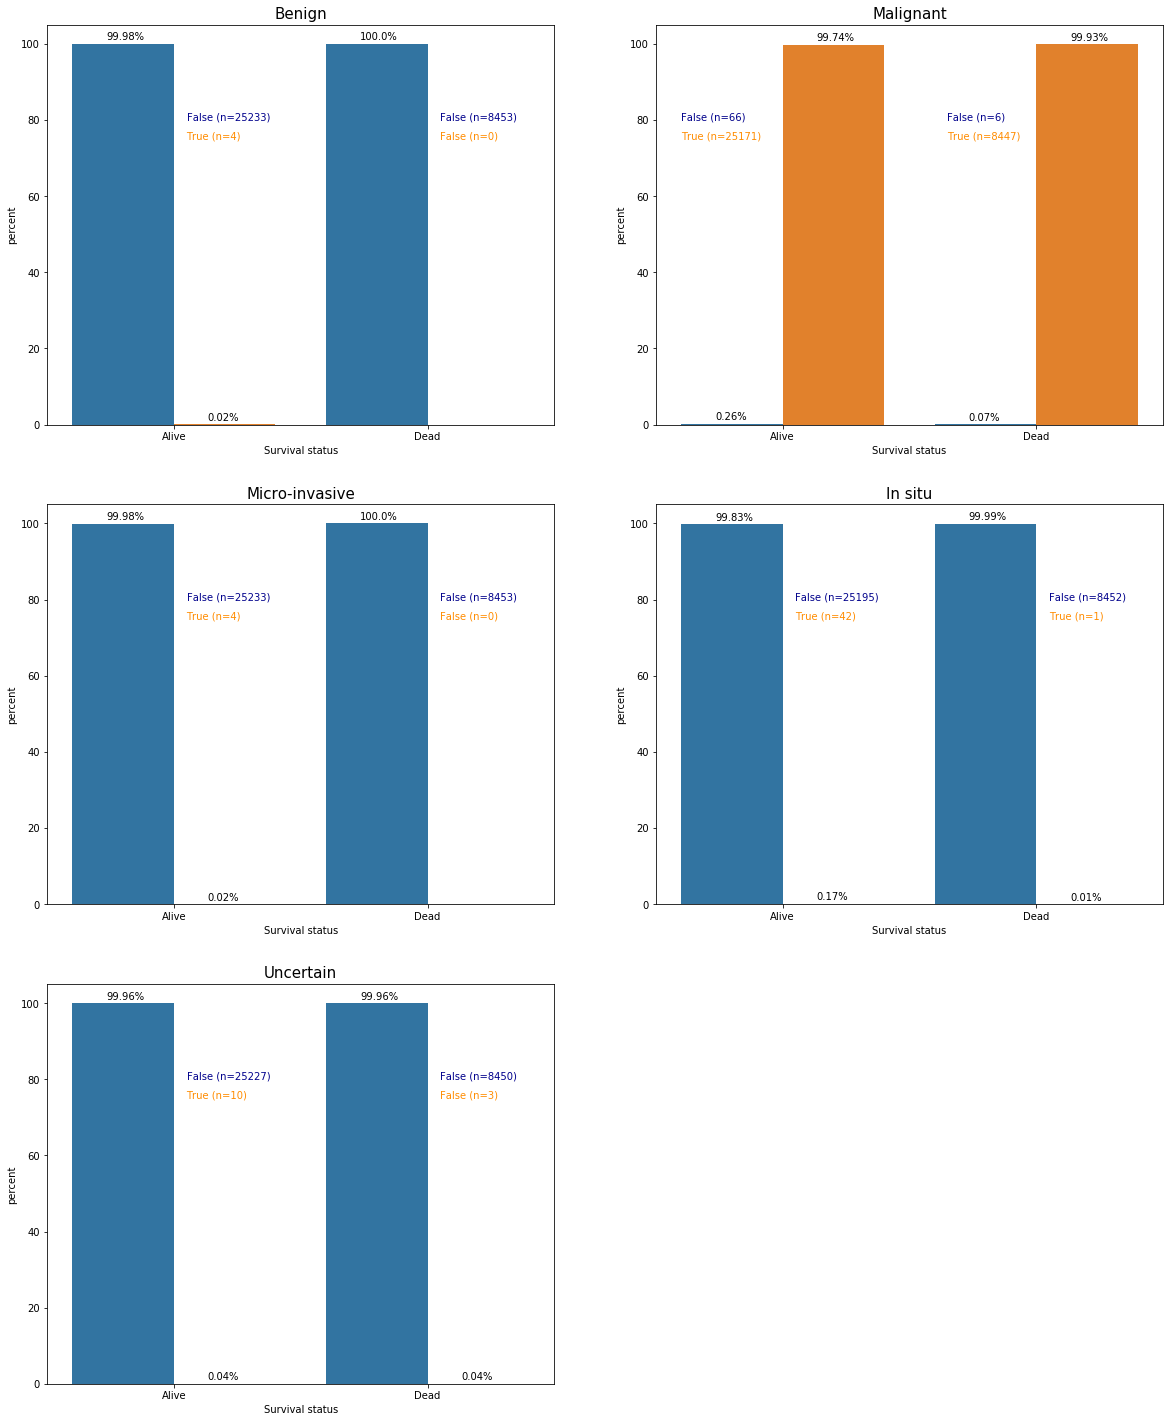

In [38]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'BEH_BENIGN'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Benign', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)

axes[0,0].text(0.05, 80, "False (n=25233)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=8453)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "False (n=0)", horizontalalignment='left', size='medium', color='darkorange')  


#Figure 2
x, y = 'DEAD', 'BEH_MALIG'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Malignant', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)
    
axes[0,1].text(-0.4, 80, "False (n=66)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(-0.4, 75, "True (n=25171)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(0.65, 80, "False (n=6)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.65, 75, "True (n=8447)", horizontalalignment='left', size='medium', color='darkorange')    

#Figure 3
x, y = 'DEAD', 'BEH_MICINV'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Micro-invasive', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)
    
axes[1,0].text(0.05, 80, "False (n=25233)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=8453)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "False (n=0)", horizontalalignment='left', size='medium', color='darkorange')  


#Figure 4
x, y = 'DEAD', 'BEH_INSITU'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('In situ', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=25195)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=42)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8452)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'BEH_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Uncertain', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=25227)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=10)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=8450)", horizontalalignment='left', size='medium', color='darkblue')   
axes[2,0].text(1.05, 75, "False (n=3)", horizontalalignment='left', size='medium', color='darkorange')  
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [39]:
contingency = pd.crosstab(df['DEAD'], df['BEH_BENIGN'])
contingency

BEH_BENIGN,0,1
DEAD,,
0,25233,4
1,8453,0


In [40]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5613302345904574


In [41]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MALIG'])
contingency

BEH_MALIG,0,1
DEAD,,
0,66,25171
1,6,8447


In [42]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0016482916174079933


In [43]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MICINV'])
contingency

BEH_MICINV,0,1
DEAD,,
0,25233,4
1,8453,0


In [44]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5613302345904574


In [45]:
contingency = pd.crosstab(df['DEAD'], df['BEH_INSITU'])
contingency

BEH_INSITU,0,1
DEAD,,
0,25195,42
1,8452,1


In [46]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0010772600382926252


In [47]:
contingency = pd.crosstab(df['DEAD'], df['BEH_UNCERT'])
contingency

BEH_UNCERT,0,1
DEAD,,
0,25227,10
1,8450,3


In [48]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8788432189173621


In [49]:
df.groupby('DEAD')['T0'].value_counts()

DEAD  T0
0     0     25230
      1         7
1     0      8451
      1         2
Name: T0, dtype: int64

In [50]:
df.groupby('DEAD')['T1'].value_counts()

DEAD  T1
0     0     22373
      1      2864
1     0      8173
      1       280
Name: T1, dtype: int64

In [51]:
df.groupby('DEAD')['T2'].value_counts()

DEAD  T2
0     0     22065
      1      3172
1     0      8038
      1       415
Name: T2, dtype: int64

In [52]:
df.groupby('DEAD')['T3'].value_counts()

DEAD  T3
0     0     14580
      1     10657
1     0      5843
      1      2610
Name: T3, dtype: int64

In [53]:
df.groupby('DEAD')['T4'].value_counts()

DEAD  T4
0     0     19509
      1      5728
1     0      6187
      1      2266
Name: T4, dtype: int64

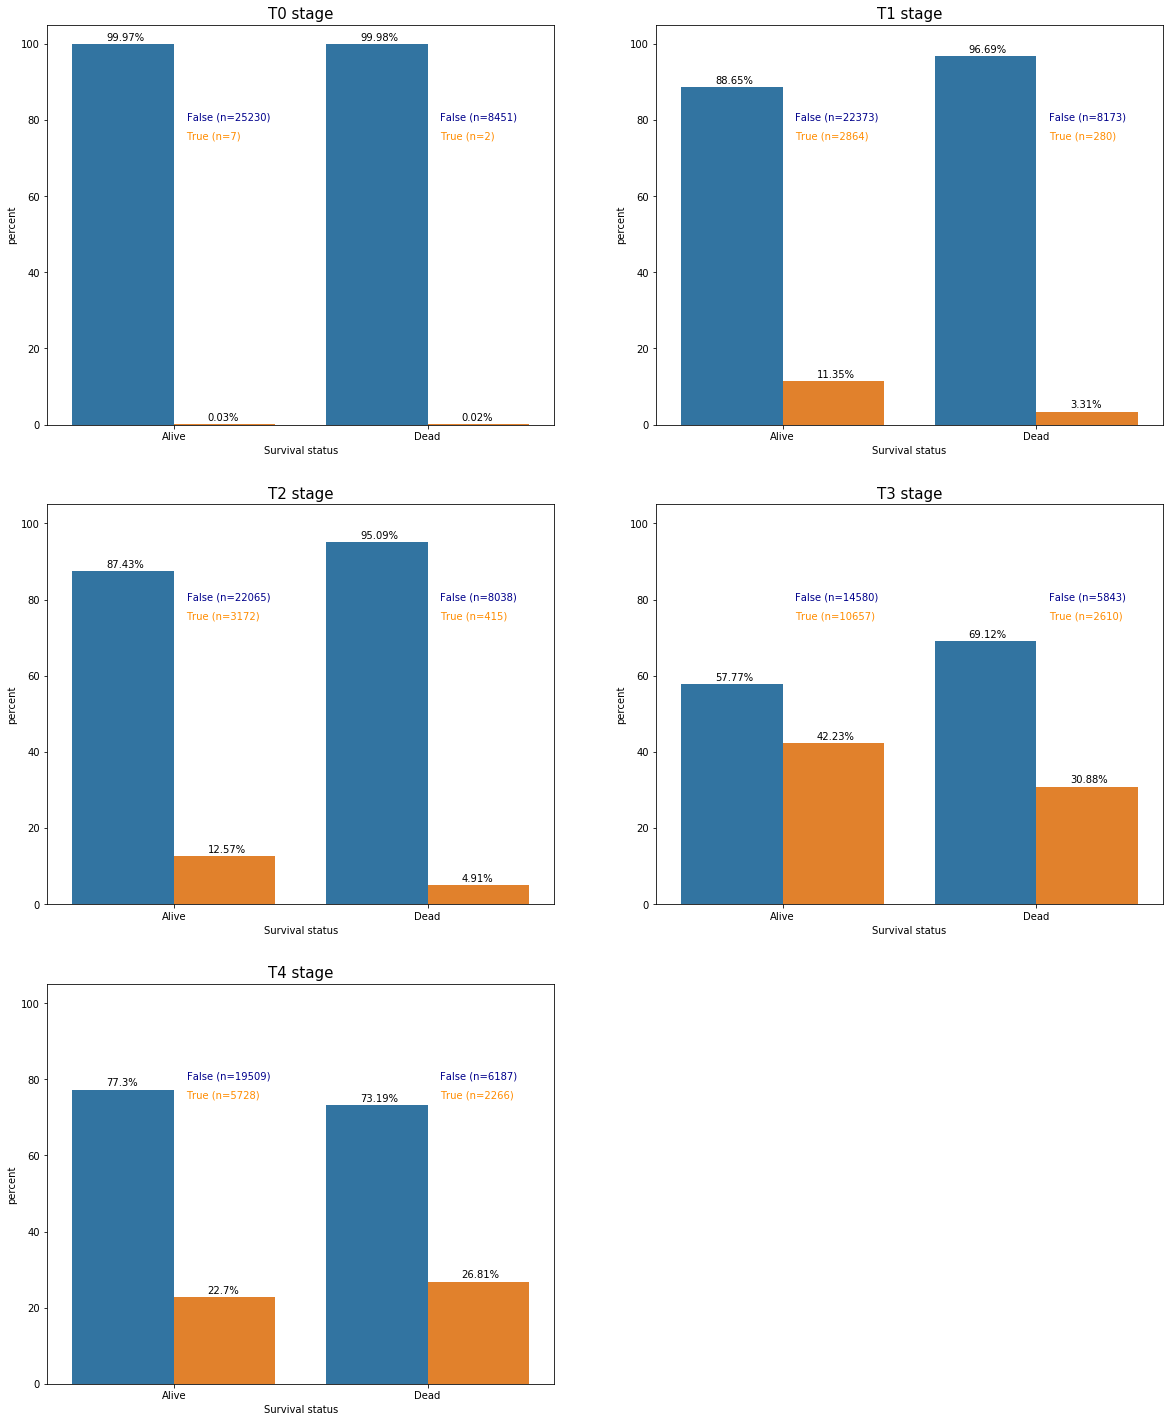

In [54]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'T0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('T0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=25230)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=7)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=8451)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'T1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('T1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=22373)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=2864)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=8173)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=280)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'T2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('T2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=22065)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3172)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=8038)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=415)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'T3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('T3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=14580)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=10657)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=5843)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=2610)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'T4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('T4 stage', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=19509)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=5728)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=6187)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=2266)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [55]:
contingency = pd.crosstab(df['DEAD'], df['T0'])
contingency

T0,0,1
DEAD,,
0,25230,7
1,8451,2


In [56]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8524613720234681


In [57]:
contingency = pd.crosstab(df['DEAD'], df['T1'])
contingency

T1,0,1
DEAD,,
0,22373,2864
1,8173,280


In [58]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.676169536760667e-107


In [59]:
contingency = pd.crosstab(df['DEAD'], df['T2'])
contingency

T2,0,1
DEAD,,
0,22065,3172
1,8038,415


In [60]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.76984013740833e-87


In [61]:
contingency = pd.crosstab(df['DEAD'], df['T3'])
contingency

T3,0,1
DEAD,,
0,14580,10657
1,5843,2610


In [62]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.337588189437832e-76


In [63]:
contingency = pd.crosstab(df['DEAD'], df['T4'])
contingency

T4,0,1
DEAD,,
0,19509,5728
1,6187,2266


In [64]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.6745653346419808e-14


In [65]:
df.groupby('DEAD')['N0'].value_counts()

DEAD  N0
0     1     14026
      0     11211
1     0      6464
      1      1989
Name: N0, dtype: int64

In [66]:
df.groupby('DEAD')['N1'].value_counts()

DEAD  N1
0     0     20182
      1      5055
1     0      6400
      1      2053
Name: N1, dtype: int64

In [67]:
df.groupby('DEAD')['N2'].value_counts()

DEAD  N2
0     0     22254
      1      2983
1     0      6905
      1      1548
Name: N2, dtype: int64

In [68]:
df.groupby('DEAD')['N3'].value_counts()

DEAD  N3
0     0     25206
      1        31
1     0      8438
      1        15
Name: N3, dtype: int64

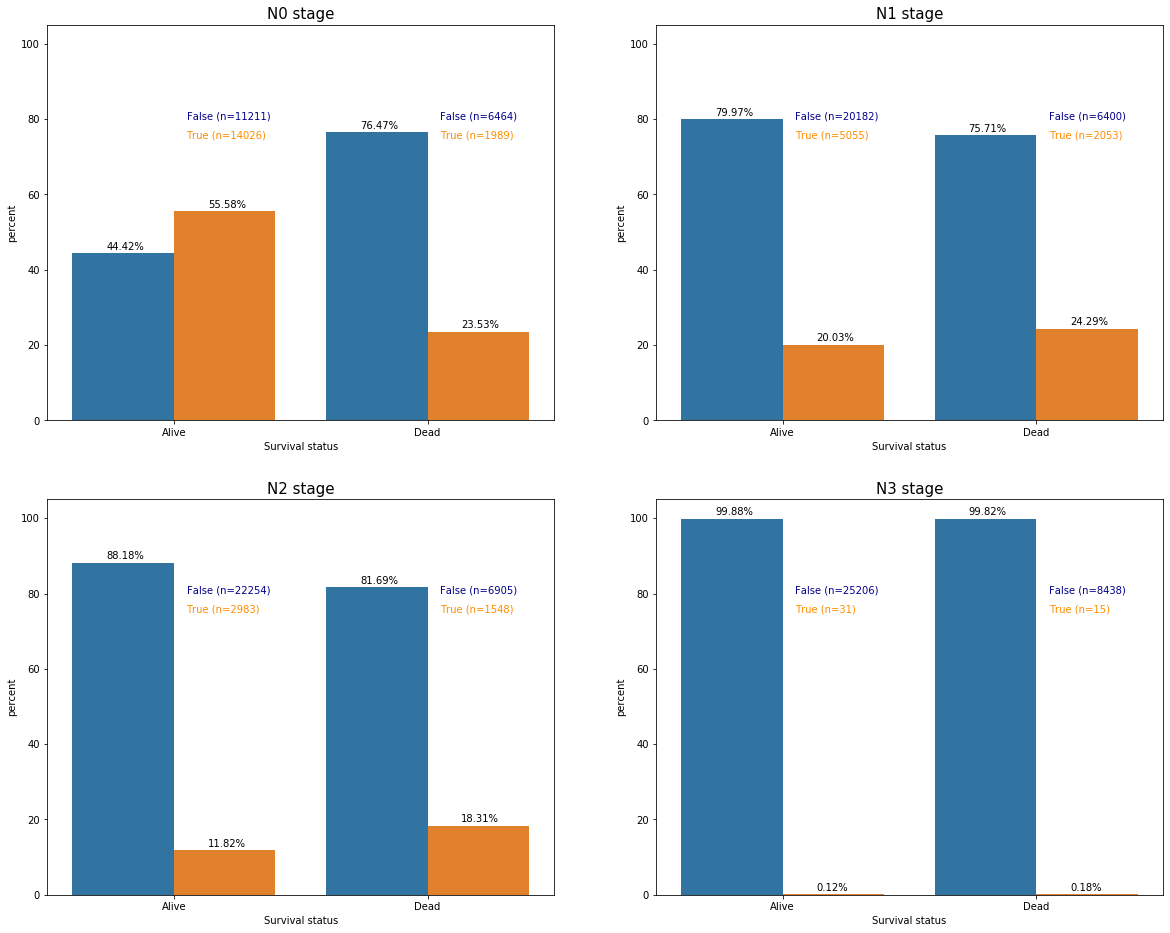

In [69]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))

#Figure 1
x, y = 'DEAD', 'N0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('N0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=11211)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=14026)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6464)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1989)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'N1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('N1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=20182)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=5055)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=6400)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=2053)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'N2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('N2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=22254)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=2983)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=6905)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1548)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'N3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('N3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=25206)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=31)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8438)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=15)", horizontalalignment='left', size='medium', color='darkorange')

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [70]:
contingency = pd.crosstab(df['DEAD'], df['N0'])
contingency

N0,0,1
DEAD,,
0,11211,14026
1,6464,1989


In [71]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [72]:
contingency = pd.crosstab(df['DEAD'], df['N1'])
contingency

N1,0,1
DEAD,,
0,20182,5055
1,6400,2053


In [73]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.1577602005921454e-16


In [74]:
contingency = pd.crosstab(df['DEAD'], df['N2'])
contingency

N2,0,1
DEAD,,
0,22254,2983
1,6905,1548


In [75]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.0973711417784745e-51


In [76]:
contingency = pd.crosstab(df['DEAD'], df['N3'])
contingency

N3,0,1
DEAD,,
0,25206,31
1,8438,15


In [77]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.314029046788351


In [78]:
df.groupby('DEAD')['M1'].value_counts()

DEAD  M1
0     0     22669
      1      2568
1     0      4617
      1      3836
Name: M1, dtype: int64

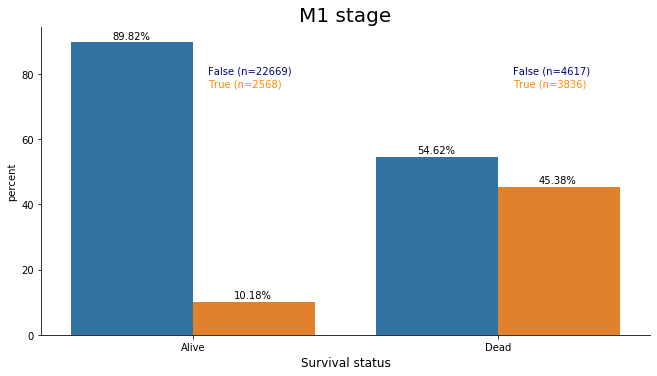

In [79]:
x, y = 'DEAD', 'M1'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('M1 stage', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=22669)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=2568)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=4617)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=3836)", horizontalalignment='left', size='medium', color='darkorange');

In [80]:
contingency = pd.crosstab(df['DEAD'], df['M1'])
contingency

M1,0,1
DEAD,,
0,22669,2568
1,4617,3836


In [81]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [82]:
df.groupby('DEAD')['STAGE0'].value_counts()

DEAD  STAGE0
0     0         25172
      1            65
1     0          8444
      1             9
Name: STAGE0, dtype: int64

In [83]:
df.groupby('DEAD')['STAGE1'].value_counts()

DEAD  STAGE1
0     0         20384
      1          4853
1     0          8143
      1           310
Name: STAGE1, dtype: int64

In [84]:
df.groupby('DEAD')['STAGE2'].value_counts()

DEAD  STAGE2
0     0         16423
      1          8814
1     0          7522
      1           931
Name: STAGE2, dtype: int64

In [85]:
df.groupby('DEAD')['STAGE3'].value_counts()

DEAD  STAGE3
0     0         18588
      1          6649
1     0          6941
      1          1512
Name: STAGE3, dtype: int64

In [86]:
df.groupby('DEAD')['STAGE4'].value_counts()

DEAD  STAGE4
0     0         22580
      1          2657
1     0          4524
      1          3929
Name: STAGE4, dtype: int64

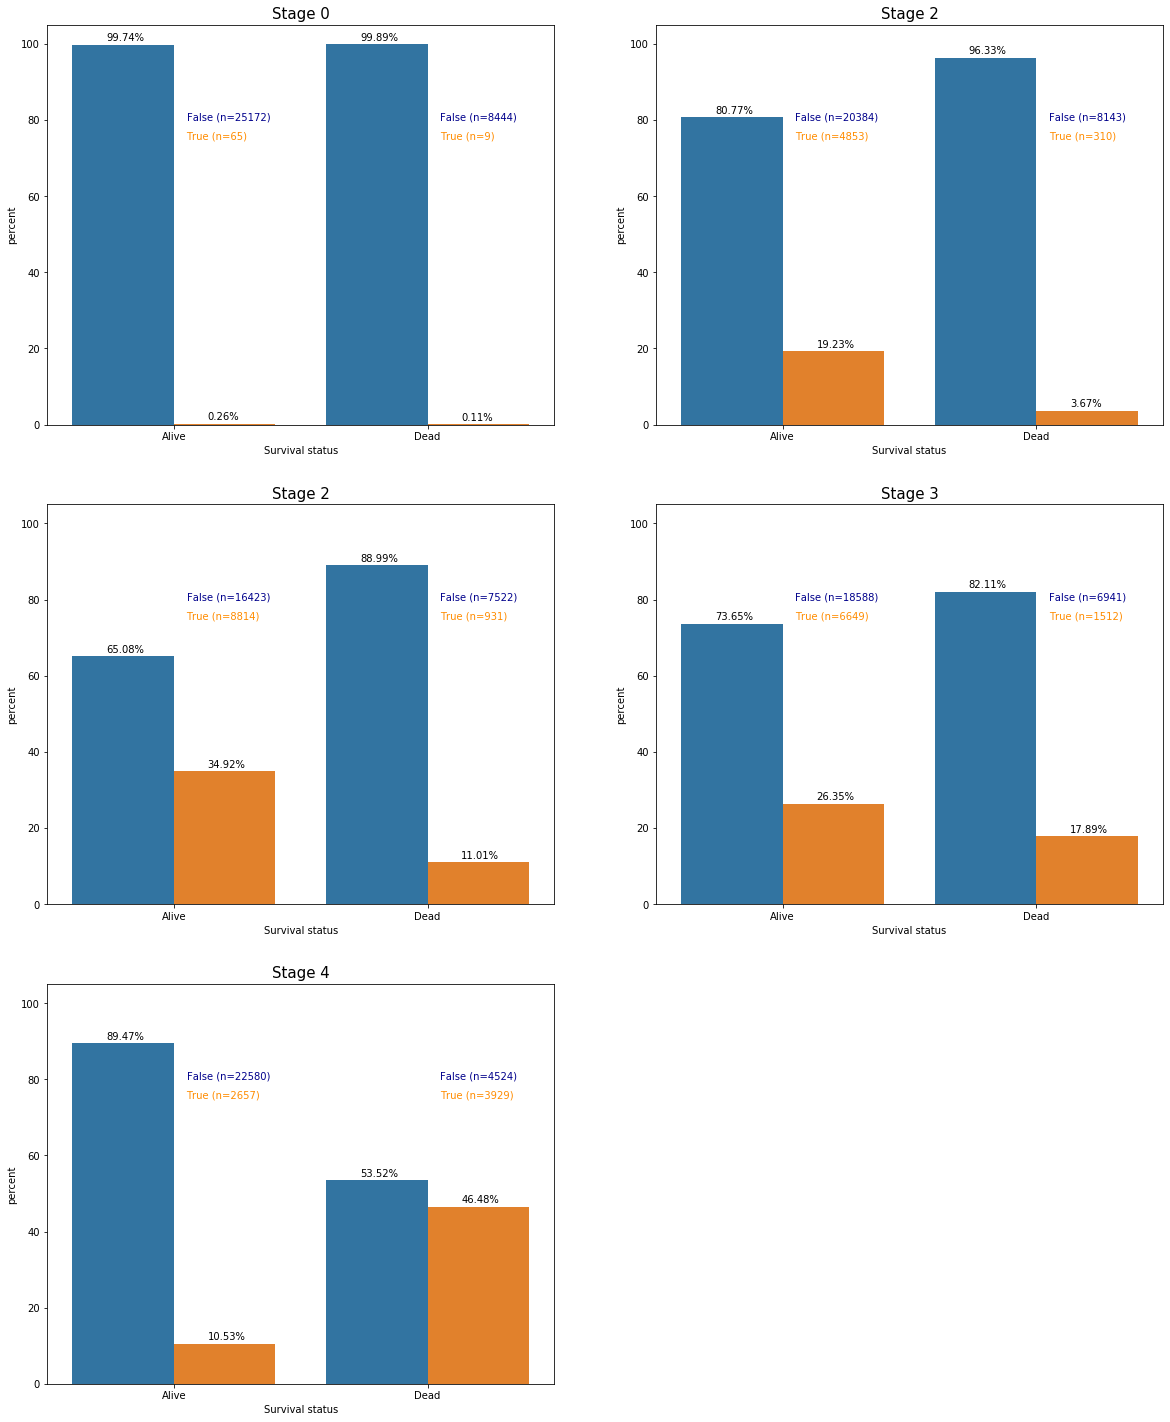

In [87]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'STAGE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Stage 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=25172)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=65)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=8444)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'STAGE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Stage 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=20384)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=4853)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=8143)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=310)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'STAGE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Stage 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=16423)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=8814)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=7522)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=931)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'STAGE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Stage 3', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=18588)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=6649)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=6941)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=1512)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'STAGE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Stage 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=22580)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2657)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=4524)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=3929)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [88]:
contingency = pd.crosstab(df['DEAD'], df['STAGE0'])
contingency

STAGE0,0,1
DEAD,,
0,25172,65
1,8444,9


In [89]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.014937375824228282


In [90]:
contingency = pd.crosstab(df['DEAD'], df['STAGE1'])
contingency

STAGE1,0,1
DEAD,,
0,20384,4853
1,8143,310


In [91]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.0048182556045937e-258


In [92]:
contingency = pd.crosstab(df['DEAD'], df['STAGE2'])
contingency

STAGE2,0,1
DEAD,,
0,16423,8814
1,7522,931


In [93]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [94]:
contingency = pd.crosstab(df['DEAD'], df['STAGE3'])
contingency

STAGE3,0,1
DEAD,,
0,18588,6649
1,6941,1512


In [95]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.5965545155311883e-55


In [96]:
contingency = pd.crosstab(df['DEAD'], df['STAGE4'])
contingency

STAGE4,0,1
DEAD,,
0,22580,2657
1,4524,3929


In [97]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [98]:
df.groupby('DEAD')['GRADE1'].value_counts()

DEAD  GRADE1
0     0         23325
      1          1912
1     0          8281
      1           172
Name: GRADE1, dtype: int64

In [99]:
df.groupby('DEAD')['GRADE2'].value_counts()

DEAD  GRADE2
0     1         17525
      0          7712
1     0          5489
      1          2964
Name: GRADE2, dtype: int64

In [100]:
df.groupby('DEAD')['GRADE3'].value_counts()

DEAD  GRADE3
0     0         21945
      1          3292
1     0          7032
      1          1421
Name: GRADE3, dtype: int64

In [101]:
df.groupby('DEAD')['GRADE4'].value_counts()

DEAD  GRADE4
0     0         25201
      1            36
1     0          8421
      1            32
Name: GRADE4, dtype: int64

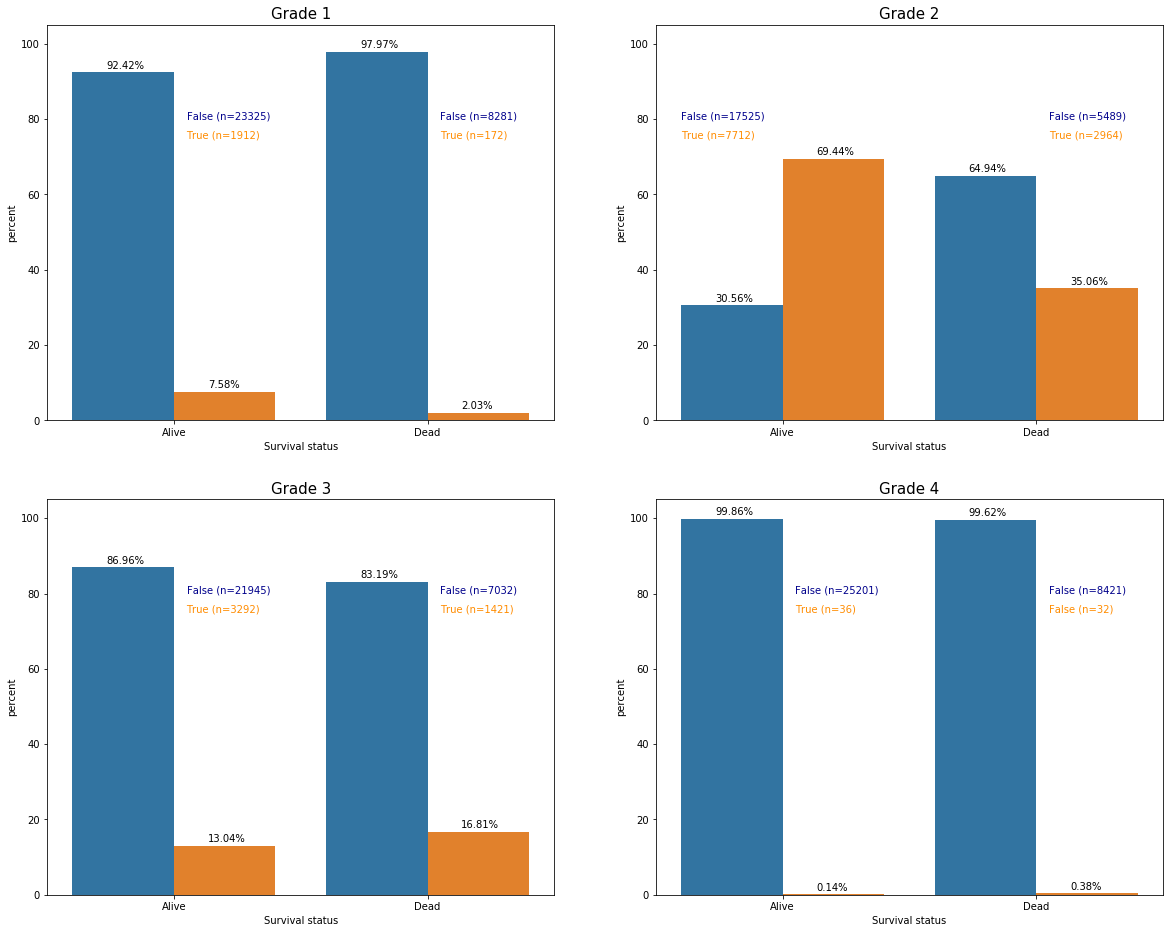

In [102]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'GRADE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Grade 1', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=23325)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=1912)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=8281)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=172)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'GRADE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Grade 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(-0.4, 80, 'False (n=17525)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(-0.4, 75, 'True (n=7712)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=5489)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=2964)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'GRADE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Grade 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=21945)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3292)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=7032)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1421)", horizontalalignment='left', size='medium', color='darkorange')               

#Figure 4
x, y = 'DEAD', 'GRADE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Grade 4', fontsize=15)               
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()               
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=25201)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=36)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8421)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "False (n=32)", horizontalalignment='left', size='medium', color='darkorange')
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [103]:
contingency = pd.crosstab(df['DEAD'], df['GRADE1'])
contingency

GRADE1,0,1
DEAD,,
0,23325,1912
1,8281,172


In [104]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.2269733986966369e-74


In [105]:
contingency = pd.crosstab(df['DEAD'], df['GRADE2'])
contingency

GRADE2,0,1
DEAD,,
0,7712,17525
1,5489,2964


In [106]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [107]:
contingency = pd.crosstab(df['DEAD'], df['GRADE3'])
contingency

GRADE3,0,1
DEAD,,
0,21945,3292
1,7032,1421


In [108]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.590687578838675e-18


In [109]:
contingency = pd.crosstab(df['DEAD'], df['GRADE4'])
contingency

GRADE4,0,1
DEAD,,
0,25201,36
1,8421,32


In [110]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

5.2818838358785315e-05


In [111]:
df.groupby('DEAD')['AGE_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,70.113365,13.444866,3.0,63.0,72.0,80.0,104.0
1,8453.0,73.413167,13.020999,0.0,66.0,76.0,83.0,105.0


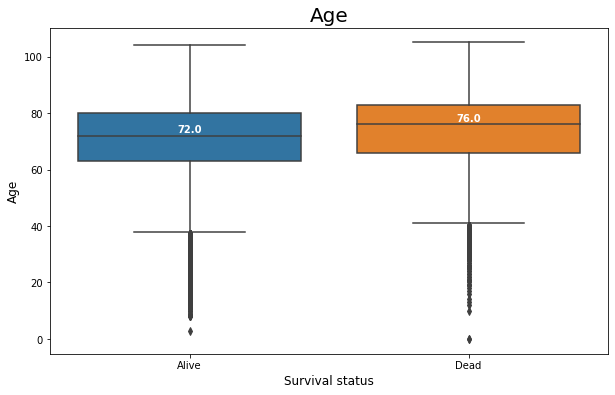

In [112]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'AGE_MEDIAN')

medians = df.groupby(['DEAD'])['AGE_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [113]:
df.groupby('DEAD')['L0801'].value_counts()

DEAD  L0801
0     0        20185
      1         5052
1     0         6813
      1         1640
Name: L0801, dtype: int64

In [114]:
df.groupby('DEAD')['L0201'].value_counts()

DEAD  L0201
0     0        21926
      1         3311
1     0         7300
      1         1153
Name: L0201, dtype: int64

In [115]:
df.groupby('DEAD')['L0301'].value_counts()

DEAD  L0301
0     0        22873
      1         2364
1     0         7618
      1          835
Name: L0301, dtype: int64

In [116]:
df.groupby('DEAD')['L1201'].value_counts()

DEAD  L1201
0     0        22498
      1         2739
1     0         7522
      1          931
Name: L1201, dtype: int64

In [117]:
df.groupby('DEAD')['L0401'].value_counts()

DEAD  L0401
0     0        22120
      1         3117
1     0         7502
      1          951
Name: L0401, dtype: int64

In [118]:
df.groupby('DEAD')['L1701'].value_counts()

DEAD  L1701
0     0        21957
      1         3280
1     0         7313
      1         1140
Name: L1701, dtype: int64

In [119]:
df.groupby('DEAD')['L1001'].value_counts()

DEAD  L1001
0     0        21323
      1         3914
1     0         7109
      1         1344
Name: L1001, dtype: int64

In [120]:
df.groupby('DEAD')['L0901'].value_counts()

DEAD  L0901
0     0        23771
      1         1466
1     0         7994
      1          459
Name: L0901, dtype: int64

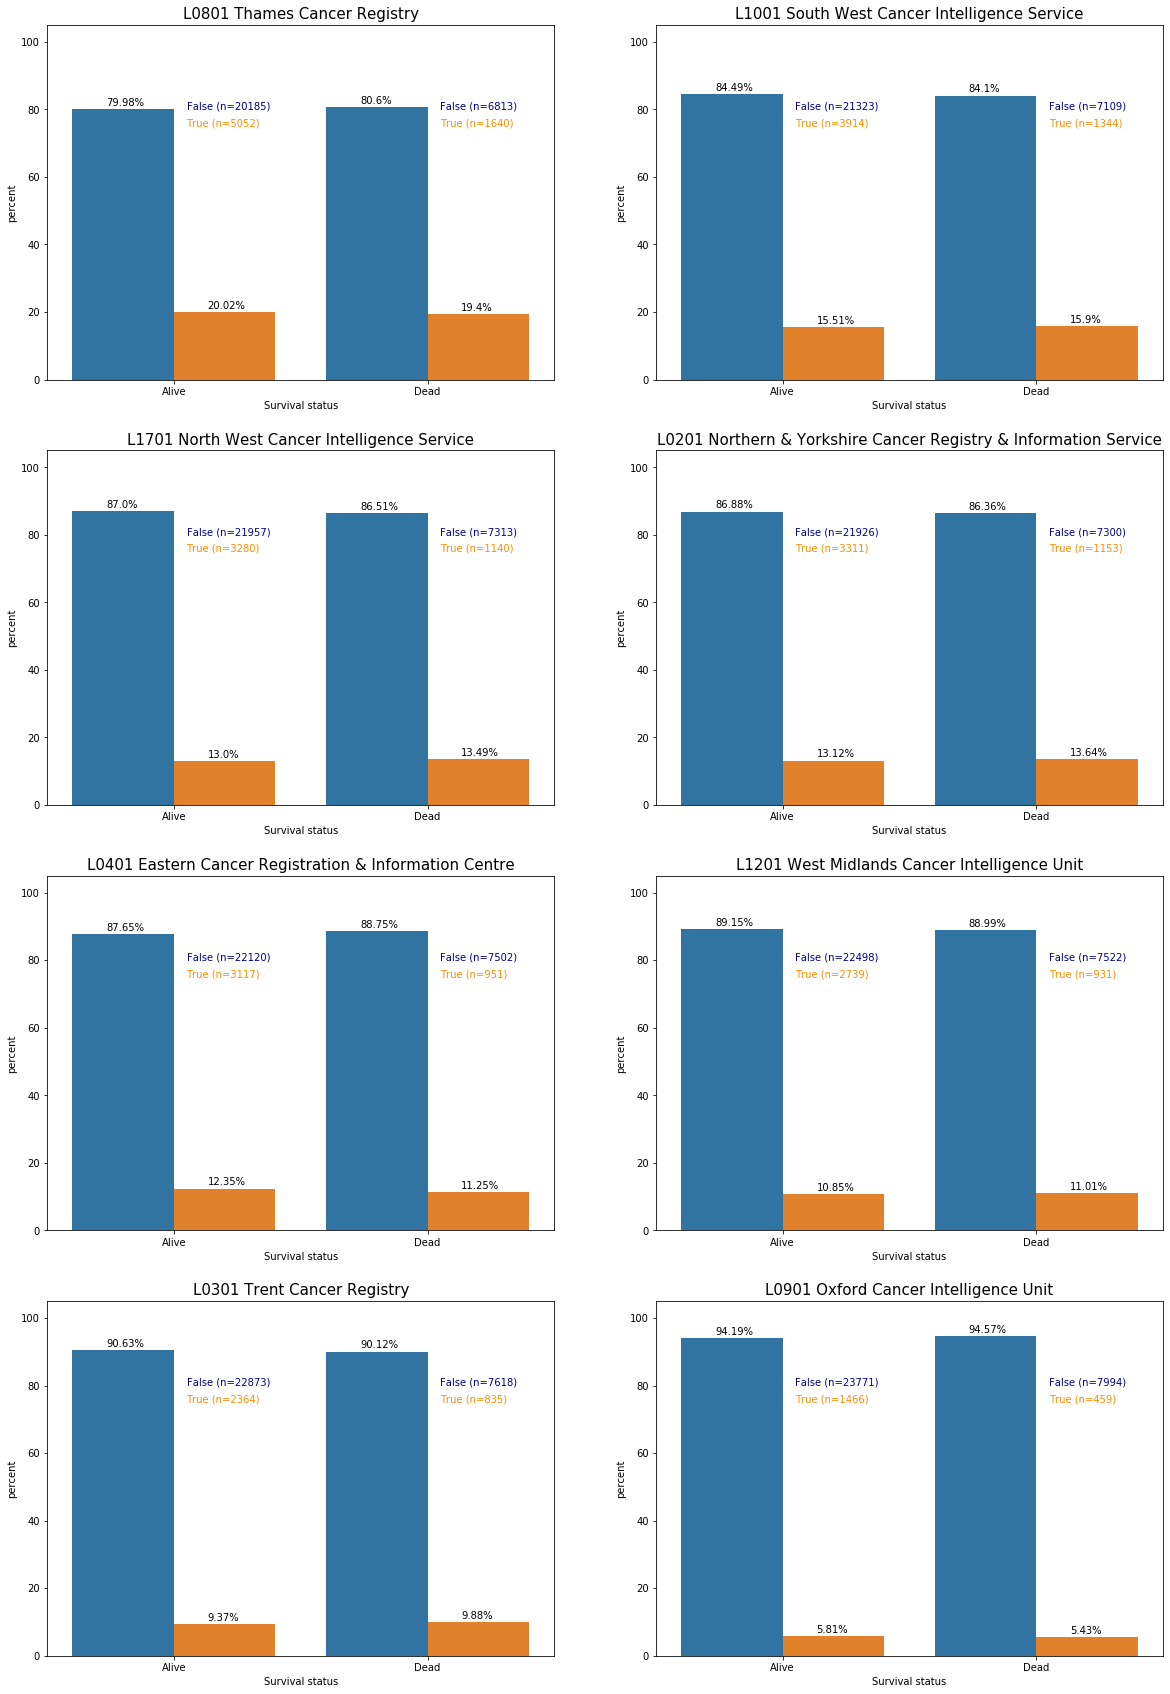

In [121]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'L0801'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('L0801 Thames Cancer Registry', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=20185)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=5052)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6813)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1640)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'L1001'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('L1001 South West Cancer Intelligence Service', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=21323)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=3914)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=7109)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=1344)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'L1701'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('L1701 North West Cancer Intelligence Service', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=21957)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3280)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=7313)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1140)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'L0201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('L0201 Northern & Yorkshire Cancer Registry & Information Service', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=21926)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=3311)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=7300)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=1153)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'L0401'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('L0401 Eastern Cancer Registration & Information Centre', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=22120)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=3117)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=7502)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=951)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 6
x, y = 'DEAD', 'L1201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('L1201 West Midlands Cancer Intelligence Unit', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=22498)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=2739)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=7522)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=931)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 7
x, y = 'DEAD', 'L0301'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('L0301 Trent Cancer Registry', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=22873)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=2364)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=7618)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=835)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 8
x, y = 'DEAD', 'L0901'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('L0901 Oxford Cancer Intelligence Unit', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=23771)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=1466)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=7994)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=459)", horizontalalignment='left', size='medium', color='darkorange')  
    
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [122]:
contingency = pd.crosstab(df['DEAD'], df['L0801'])
contingency

L0801,0,1
DEAD,,
0,20185,5052
1,6813,1640


In [123]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.22455211076741832


In [124]:
contingency = pd.crosstab(df['DEAD'], df['L1001'])
contingency

L1001,0,1
DEAD,,
0,21323,3914
1,7109,1344


In [125]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.40127261155656535


In [126]:
contingency = pd.crosstab(df['DEAD'], df['L1701'])
contingency

L1701,0,1
DEAD,,
0,21957,3280
1,7313,1140


In [127]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.25627943473703174


In [128]:
contingency = pd.crosstab(df['DEAD'], df['L0201'])
contingency

L0201,0,1
DEAD,,
0,21926,3311
1,7300,1153


In [129]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.22892734516113694


In [130]:
contingency = pd.crosstab(df['DEAD'], df['L0401'])
contingency

L0401,0,1
DEAD,,
0,22120,3117
1,7502,951


In [131]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.007624574061036572


In [132]:
contingency = pd.crosstab(df['DEAD'], df['L1201'])
contingency

L1201,0,1
DEAD,,
0,22498,2739
1,7522,931


In [133]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6962791696009853


In [134]:
contingency = pd.crosstab(df['DEAD'], df['L0301'])
contingency

L0301,0,1
DEAD,,
0,22873,2364
1,7618,835


In [135]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1720908020194393


In [136]:
contingency = pd.crosstab(df['DEAD'], df['L0901'])
contingency

L0901,0,1
DEAD,,
0,23771,1466
1,7994,459


In [137]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2033900226208886


In [138]:
df.groupby('DEAD')['CURATIVE_TREAT'].value_counts()

DEAD  CURATIVE_TREAT
0     0                 18047
      1                  7190
1     0                  6037
      1                  2416
Name: CURATIVE_TREAT, dtype: int64

In [139]:
df.groupby('DEAD')['NONCURATIVE_TREAT'].value_counts()

DEAD  NONCURATIVE_TREAT
0     0                    23416
      1                     1821
1     0                     7867
      1                      586
Name: NONCURATIVE_TREAT, dtype: int64

In [140]:
df.groupby('DEAD')['NO_ACTIVE_TREAT'].value_counts()

DEAD  NO_ACTIVE_TREAT
0     0                  24743
      1                    494
1     0                   8292
      1                    161
Name: NO_ACTIVE_TREAT, dtype: int64

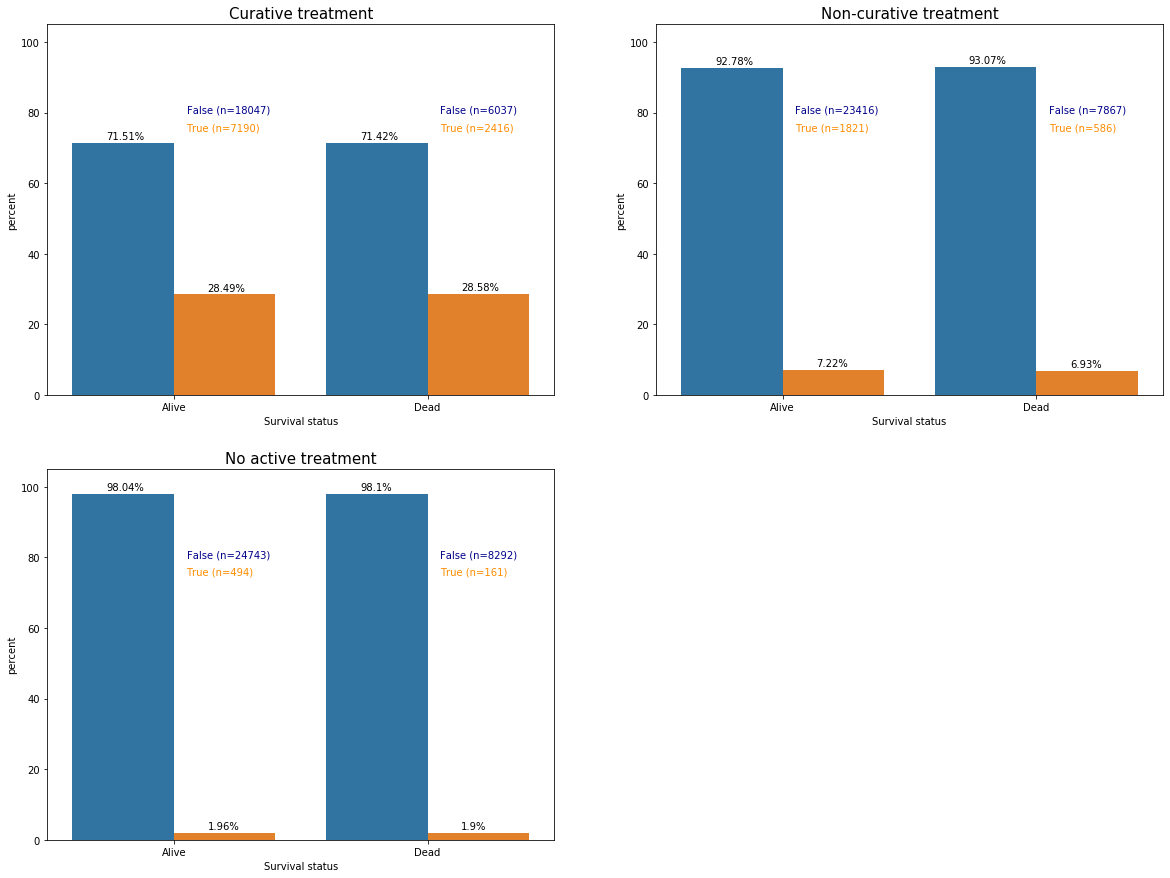

In [141]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Curative treatment', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=18047)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=7190)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6037)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=2416)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'NONCURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Non-curative treatment', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=23416)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=1821)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=7867)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=586)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'NO_ACTIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('No active treatment', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=24743)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=494)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=8292)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=161)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
f.delaxes(ax = axes[1,1]) 
plt.show()

In [142]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE_TREAT'])
contingency

CURATIVE_TREAT,0,1
DEAD,,
0,18047,7190
1,6037,2416


In [143]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8826388990073631


In [144]:
contingency = pd.crosstab(df['DEAD'], df['NONCURATIVE_TREAT'])
contingency

NONCURATIVE_TREAT,0,1
DEAD,,
0,23416,1821
1,7867,586


In [145]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3951175307557322


In [146]:
contingency = pd.crosstab(df['DEAD'], df['NO_ACTIVE_TREAT'])
contingency

NO_ACTIVE_TREAT,0,1
DEAD,,
0,24743,494
1,8292,161


In [147]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7958222190566735


In [148]:
df.groupby('DEAD')['ECOG0'].value_counts()

DEAD  ECOG0
0     0        21750
      1         3487
1     0         7276
      1         1177
Name: ECOG0, dtype: int64

In [149]:
df.groupby('DEAD')['ECOG1'].value_counts()

DEAD  ECOG1
0     0        23116
      1         2121
1     0         7749
      1          704
Name: ECOG1, dtype: int64

In [150]:
df.groupby('DEAD')['ECOG2'].value_counts()

DEAD  ECOG2
0     0        24229
      1         1008
1     0         8145
      1          308
Name: ECOG2, dtype: int64

In [151]:
df.groupby('DEAD')['ECOG3'].value_counts()

DEAD  ECOG3
0     0        24615
      1          622
1     0         8271
      1          182
Name: ECOG3, dtype: int64

In [152]:
df.groupby('DEAD')['ECOG4'].value_counts()

DEAD  ECOG4
0     0        25081
      1          156
1     0         8414
      1           39
Name: ECOG4, dtype: int64

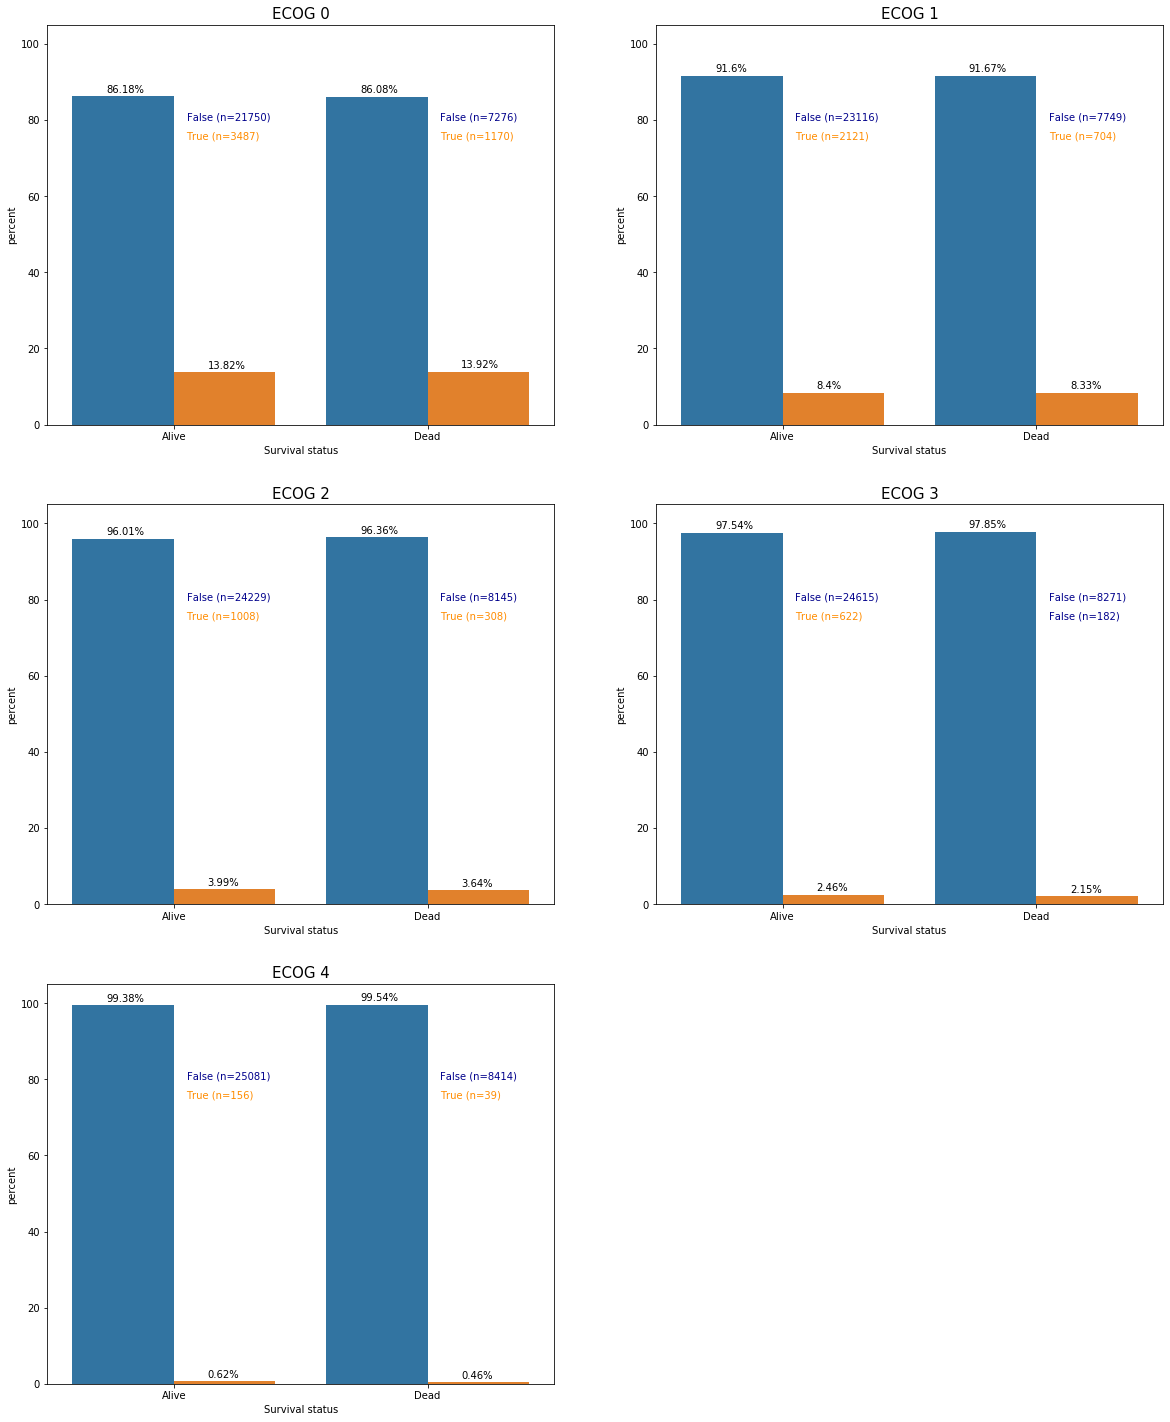

In [153]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ECOG0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('ECOG 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=21750)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=3487)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=7276)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1170)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'ECOG1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('ECOG 1', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=23116)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=2121)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=7749)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=704)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'ECOG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('ECOG 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=24229)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=1008)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=8145)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=308)", horizontalalignment='left', size='medium', color='darkorange') 
    

#Figure 4
x, y = 'DEAD', 'ECOG3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('ECOG 3', fontsize=15) 
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=24615)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=622)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8271)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "False (n=182)", horizontalalignment='left', size='medium', color='darkblue')

#Figure 5
x, y = 'DEAD', 'ECOG4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('ECOG 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=25081)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=156)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=8414)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=39)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [154]:
contingency = pd.crosstab(df['DEAD'], df['ECOG0'])
contingency

ECOG0,0,1
DEAD,,
0,21750,3487
1,7276,1177


In [155]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8193135234697189


In [156]:
contingency = pd.crosstab(df['DEAD'], df['ECOG1'])
contingency

ECOG1,0,1
DEAD,,
0,23116,2121
1,7749,704


In [157]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8451549756747971


In [158]:
contingency = pd.crosstab(df['DEAD'], df['ECOG2'])
contingency

ECOG2,0,1
DEAD,,
0,24229,1008
1,8145,308


In [159]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.15943274953599107


In [160]:
contingency = pd.crosstab(df['DEAD'], df['ECOG3'])
contingency

ECOG3,0,1
DEAD,,
0,24615,622
1,8271,182


In [161]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.11338493756295197


In [162]:
contingency = pd.crosstab(df['DEAD'], df['ECOG4'])
contingency

ECOG4,0,1
DEAD,,
0,25081,156
1,8414,39


In [163]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.11838033861828934


In [164]:
df.groupby('DEAD')['DEPR1'].value_counts()

DEAD  DEPR1
0     0        19616
      1         5621
1     0         6597
      1         1856
Name: DEPR1, dtype: int64

In [165]:
df.groupby('DEAD')['DEPR2'].value_counts()

DEAD  DEPR2
0     0        19443
      1         5794
1     0         6547
      1         1906
Name: DEPR2, dtype: int64

In [166]:
df.groupby('DEAD')['DEPR3'].value_counts()

DEAD  DEPR3
0     0        19945
      1         5292
1     0         6742
      1         1711
Name: DEPR3, dtype: int64

In [167]:
df.groupby('DEAD')['DEPR4'].value_counts()

DEAD  DEPR4
0     0        20612
      1         4625
1     0         6861
      1         1592
Name: DEPR4, dtype: int64

In [168]:
df.groupby('DEAD')['DEPR5'].value_counts()

DEAD  DEPR5
0     0        21316
      1         3921
1     0         7064
      1         1389
Name: DEPR5, dtype: int64

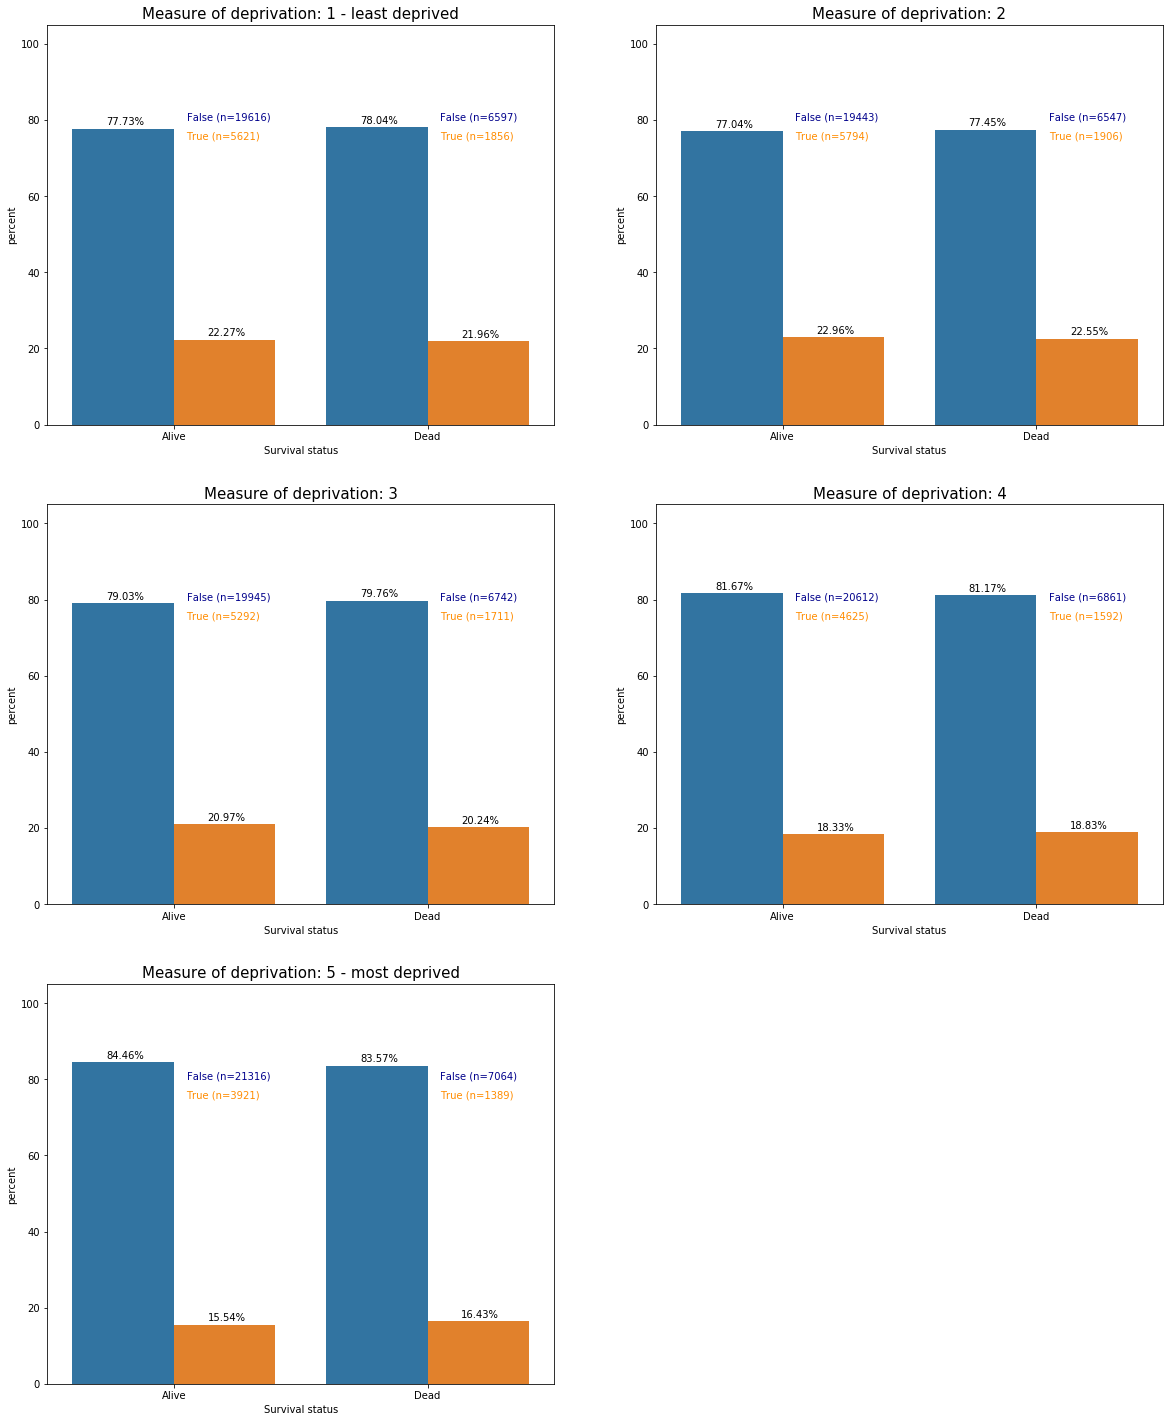

In [169]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'DEPR1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Measure of deprivation: 1 - least deprived', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=19616)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=5621)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6597)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1856)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'DEPR2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Measure of deprivation: 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=19443)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=5794)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=6547)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=1906)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'DEPR3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Measure of deprivation: 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=19945)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=5292)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=6742)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1711)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'DEPR4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Measure of deprivation: 4', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=20612)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=4625)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=6861)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=1592)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'DEPR5'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Measure of deprivation: 5 - most deprived', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=21316)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=3921)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=7064)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=1389)", horizontalalignment='left', size='medium', color='darkorange')    
    

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [170]:
contingency = pd.crosstab(df['DEAD'], df['DEPR1'])
contingency

DEPR1,0,1
DEAD,,
0,19616,5621
1,6597,1856


In [171]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5549981649383733


In [172]:
contingency = pd.crosstab(df['DEAD'], df['DEPR2'])
contingency

DEPR2,0,1
DEAD,,
0,19443,5794
1,6547,1906


In [173]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4458838241750879


In [174]:
contingency = pd.crosstab(df['DEAD'], df['DEPR3'])
contingency

DEPR3,0,1
DEAD,,
0,19945,5292
1,6742,1711


In [175]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1579793555134475


In [176]:
contingency = pd.crosstab(df['DEAD'], df['DEPR4'])
contingency

DEPR4,0,1
DEAD,,
0,20612,4625
1,6861,1592


In [177]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3056475532251929


In [178]:
contingency = pd.crosstab(df['DEAD'], df['DEPR5'])
contingency

DEPR5,0,1
DEAD,,
0,21316,3921
1,7064,1389


In [179]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.052622915998447


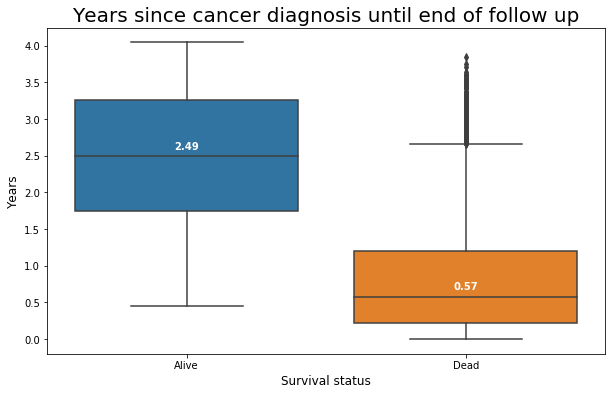

In [180]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'CANCER_YEARS_MEDIAN')

medians = df.groupby(['DEAD'])['CANCER_YEARS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Years', fontsize=12)
ax.set_title('Years since cancer diagnosis until end of follow up', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [181]:
df.groupby('DEAD')['DIAG_TO_SURG_DAYS_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,15.297203,37.228303,0.0,0.0,0.0,22.5,855.0
1,8453.0,7.453567,29.964864,0.0,0.0,0.0,0.0,482.0


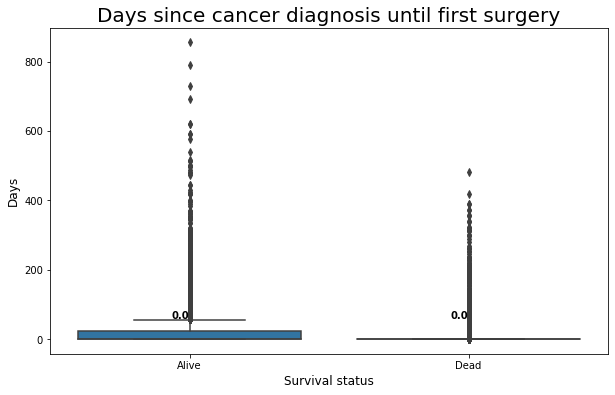

In [182]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'DIAG_TO_SURG_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_SURG_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 60, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until first surgery', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [183]:
df.groupby('DEAD')['DIAG_TO_TREAT_DAYS_MEDIAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,25237.0,181.510936,95.766629,0.0,175.0,175.0,175.0,1405.0
1,8453.0,172.515793,74.777702,0.0,175.0,175.0,175.0,1143.0


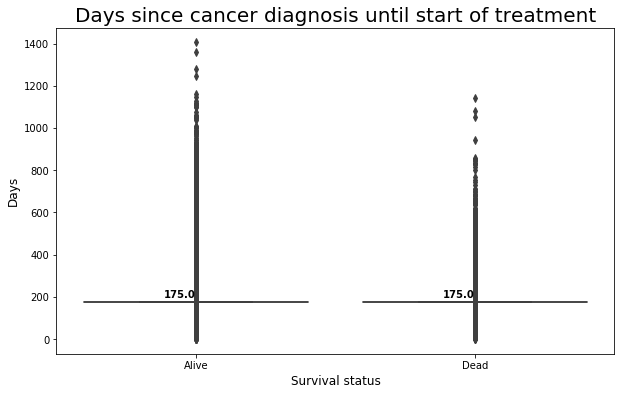

In [184]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'DIAG_TO_TREAT_DAYS_MEDIAN')

medians = df.groupby(['DEAD'])['DIAG_TO_TREAT_DAYS_MEDIAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 20, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Days', fontsize=12)
ax.set_title('Days since cancer diagnosis until start of treatment', fontsize=20)
plt.gcf().set_size_inches(10,6)

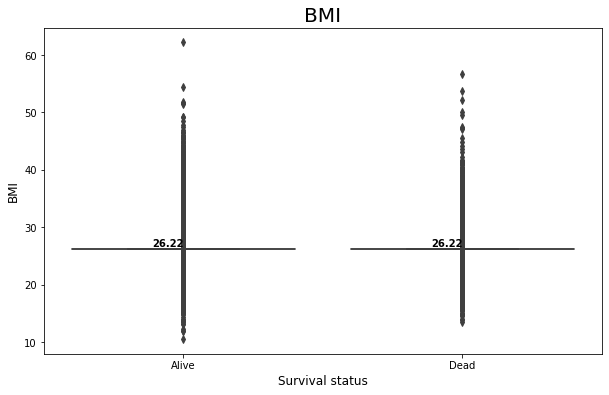

In [185]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'BMI')

medians = df.groupby(['DEAD'])['BMI'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='right', size='medium', color='black', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_title('BMI', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [186]:
df['BMI'].describe()

count    33690.000000
mean        26.273445
std          2.342596
min         10.563941
25%         26.218821
50%         26.218821
75%         26.218821
max         62.180424
Name: BMI, dtype: float64

In [187]:
df.groupby('DEAD')['NEOADJUVANT'].value_counts()

DEAD  NEOADJUVANT
0     0              24617
      1                620
1     0               8256
      1                197
Name: NEOADJUVANT, dtype: int64

In [188]:
df.groupby('DEAD')['DIAGNOSTIC'].value_counts()

DEAD  DIAGNOSTIC
0     0             25037
      1               200
1     0              8391
      1                62
Name: DIAGNOSTIC, dtype: int64

In [189]:
df.groupby('DEAD')['PALLIATIVE'].value_counts()

DEAD  PALLIATIVE
0     0             22013
      1              3224
1     0              7188
      1              1265
Name: PALLIATIVE, dtype: int64

In [190]:
df.groupby('DEAD')['CURATIVE'].value_counts()

DEAD  CURATIVE
0     0           24793
      1             444
1     0            8351
      1             102
Name: CURATIVE, dtype: int64

In [191]:
df.groupby('DEAD')['ADJUVANT'].value_counts()

DEAD  ADJUVANT
0     0           22530
      1            2707
1     0            7337
      1            1116
Name: ADJUVANT, dtype: int64

In [192]:
df.groupby('DEAD')['DISEASE_MOD'].value_counts()

DEAD  DISEASE_MOD
0     0              25234
      1                  3
1     0               8452
      1                  1
Name: DISEASE_MOD, dtype: int64

In [193]:
df.groupby('DEAD')['STAGING'].value_counts()

DEAD  STAGING
0     0          25236
      1              1
1     0           8453
Name: STAGING, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


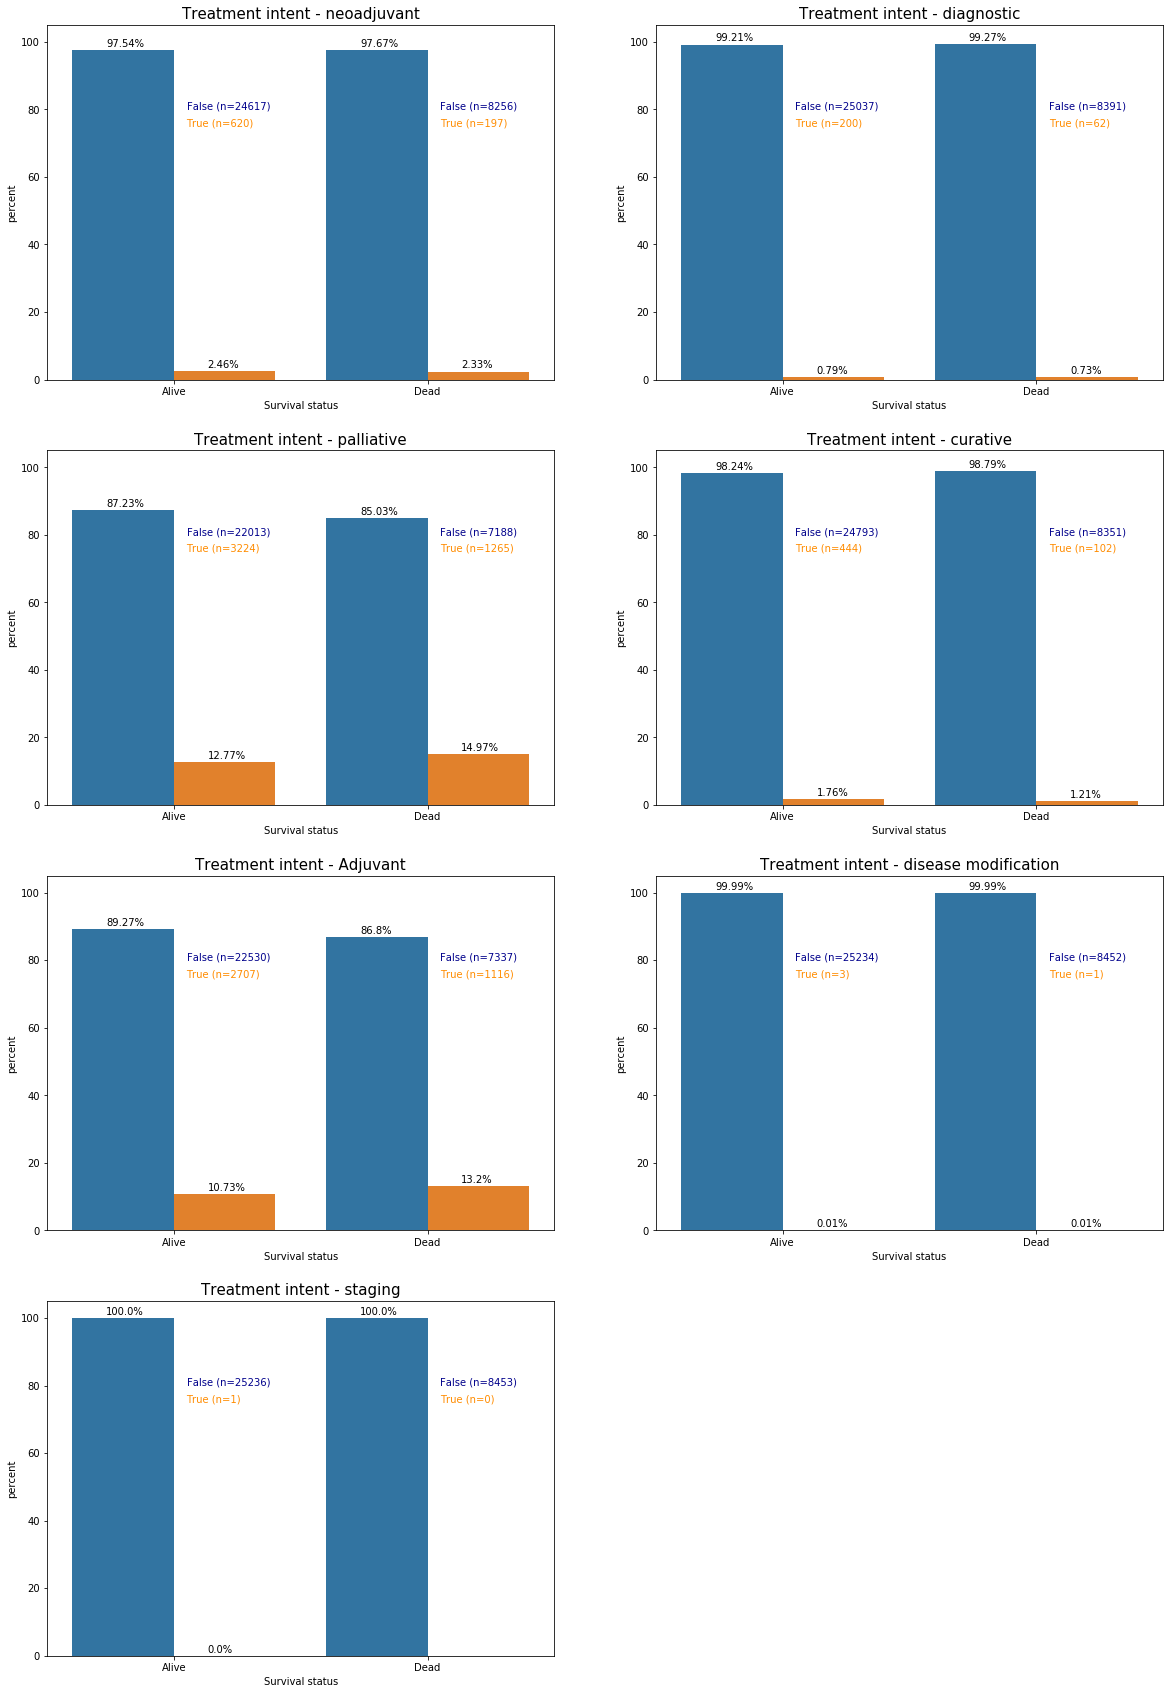

In [194]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'NEOADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Treatment intent - neoadjuvant', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=24617)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=620)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=8256)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=197)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'DIAGNOSTIC'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Treatment intent - diagnostic', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=25037)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=200)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=8391)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=62)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'PALLIATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Treatment intent - palliative', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=22013)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3224)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=7188)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=1265)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Treatment intent - curative', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=24793)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=444)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8351)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=102)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'ADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Treatment intent - Adjuvant', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=22530)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2707)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=7337)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=1116)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'DISEASE_MOD'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Treatment intent - disease modification', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=25234)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=3)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=8452)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')  


#Figure 7
x, y = 'DEAD', 'STAGING'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Treatment intent - staging', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)    
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=25236)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=8453)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=0)", horizontalalignment='left', size='medium', color='darkorange')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [195]:
contingency = pd.crosstab(df['DEAD'], df['NEOADJUVANT'])
contingency

NEOADJUVANT,0,1
DEAD,,
0,24617,620
1,8256,197


In [196]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5406253080656196


In [197]:
contingency = pd.crosstab(df['DEAD'], df['DIAGNOSTIC'])
contingency

DIAGNOSTIC,0,1
DEAD,,
0,25037,200
1,8391,62


In [198]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6432811801629642


In [199]:
contingency = pd.crosstab(df['DEAD'], df['PALLIATIVE'])
contingency

PALLIATIVE,0,1
DEAD,,
0,22013,3224
1,7188,1265


In [200]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

3.222219435041398e-07


In [201]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE'])
contingency

CURATIVE,0,1
DEAD,,
0,24793,444
1,8351,102


In [202]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0005969076101553698


In [203]:
contingency = pd.crosstab(df['DEAD'], df['ADJUVANT'])
contingency

ADJUVANT,0,1
DEAD,,
0,22530,2707
1,7337,1116


In [204]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

5.926221087450134e-10


In [205]:
contingency = pd.crosstab(df['DEAD'], df['DISEASE_MOD'])
contingency

DISEASE_MOD,0,1
DEAD,,
0,25234,3
1,8452,1


In [206]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.566974189741997


In [207]:
contingency = pd.crosstab(df['DEAD'], df['STAGING'])
contingency

STAGING,0,1
DEAD,,
0,25236,1
1,8453,0


In [208]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5655779613330609


In [209]:
df.groupby('DEAD')['CT_YES'].value_counts()

DEAD  CT_YES
0     0         24817
      1           420
1     0          8330
      1           123
Name: CT_YES, dtype: int64

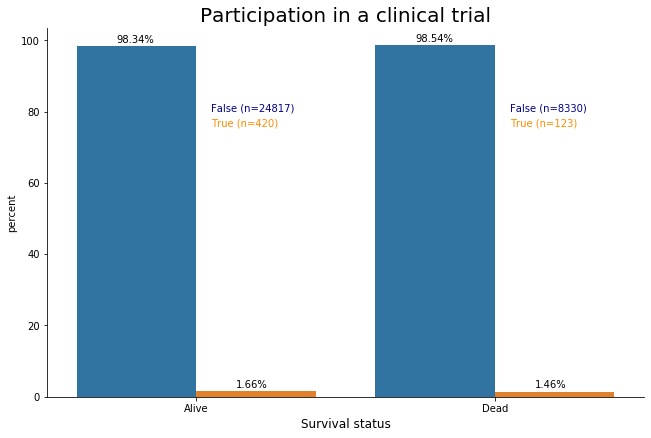

In [210]:
x, y = 'DEAD', 'CT_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Participation in a clinical trial', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=24817)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=420)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=8330)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=123)", horizontalalignment='left', size='medium', color='darkorange');

In [211]:
contingency = pd.crosstab(df['DEAD'], df['CT_YES'])
contingency

CT_YES,0,1
DEAD,,
0,24817,420
1,8330,123


In [212]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.20353804345116572


In [213]:
df.groupby('DEAD')['CHEM_RAD_YES'].value_counts()

DEAD  CHEM_RAD_YES
0     0               25063
      1                 174
1     0                8427
      1                  26
Name: CHEM_RAD_YES, dtype: int64

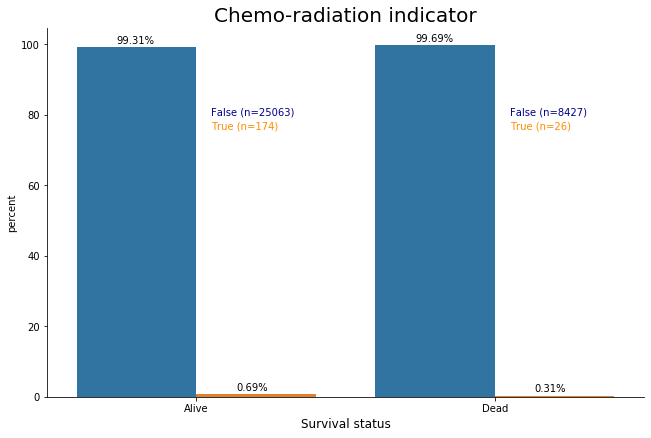

In [214]:
x, y = 'DEAD', 'CHEM_RAD_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Chemo-radiation indicator', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=25063)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=174)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=8427)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=26)", horizontalalignment='left', size='medium', color='darkorange');

In [215]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RAD_YES'])
contingency

CHEM_RAD_YES,0,1
DEAD,,
0,25063,174
1,8427,26


In [216]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.00010707824802816141


In [217]:
df.groupby('DEAD')['CHEMOTHERAPY2'].value_counts()

DEAD  CHEMOTHERAPY2
0     0                20319
      1                 4918
1     0                 6471
      1                 1982
Name: CHEMOTHERAPY2, dtype: int64

In [218]:
df.groupby('DEAD')['TARGETED2'].value_counts()

DEAD  TARGETED2
0     0            24546
      1              691
1     0             8224
      1              229
Name: TARGETED2, dtype: int64

In [219]:
df.groupby('DEAD')['CHEM_TARG2'].value_counts()

DEAD  CHEM_TARG2
0     0             24225
      1              1012
1     0              8130
      1               323
Name: CHEM_TARG2, dtype: int64

In [220]:
df.groupby('DEAD')['CHEM_RADIO2'].value_counts()

DEAD  CHEM_RADIO2
0     0              25063
      1                174
1     0               8419
      1                 34
Name: CHEM_RADIO2, dtype: int64

In [221]:
df.groupby('DEAD')['TARG_RADIO2'].value_counts()

DEAD  TARG_RADIO2
0     0              25235
      1                  2
1     0               8453
Name: TARG_RADIO2, dtype: int64

In [222]:
df.groupby('DEAD')['HORMONE2'].value_counts()

DEAD  HORMONE2
0     0           25114
      1             123
1     0            8438
      1              15
Name: HORMONE2, dtype: int64

In [223]:
df.groupby('DEAD')['OTHER2'].value_counts()

DEAD  OTHER2
0     0         25190
      1            47
1     0          8436
      1            17
Name: OTHER2, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


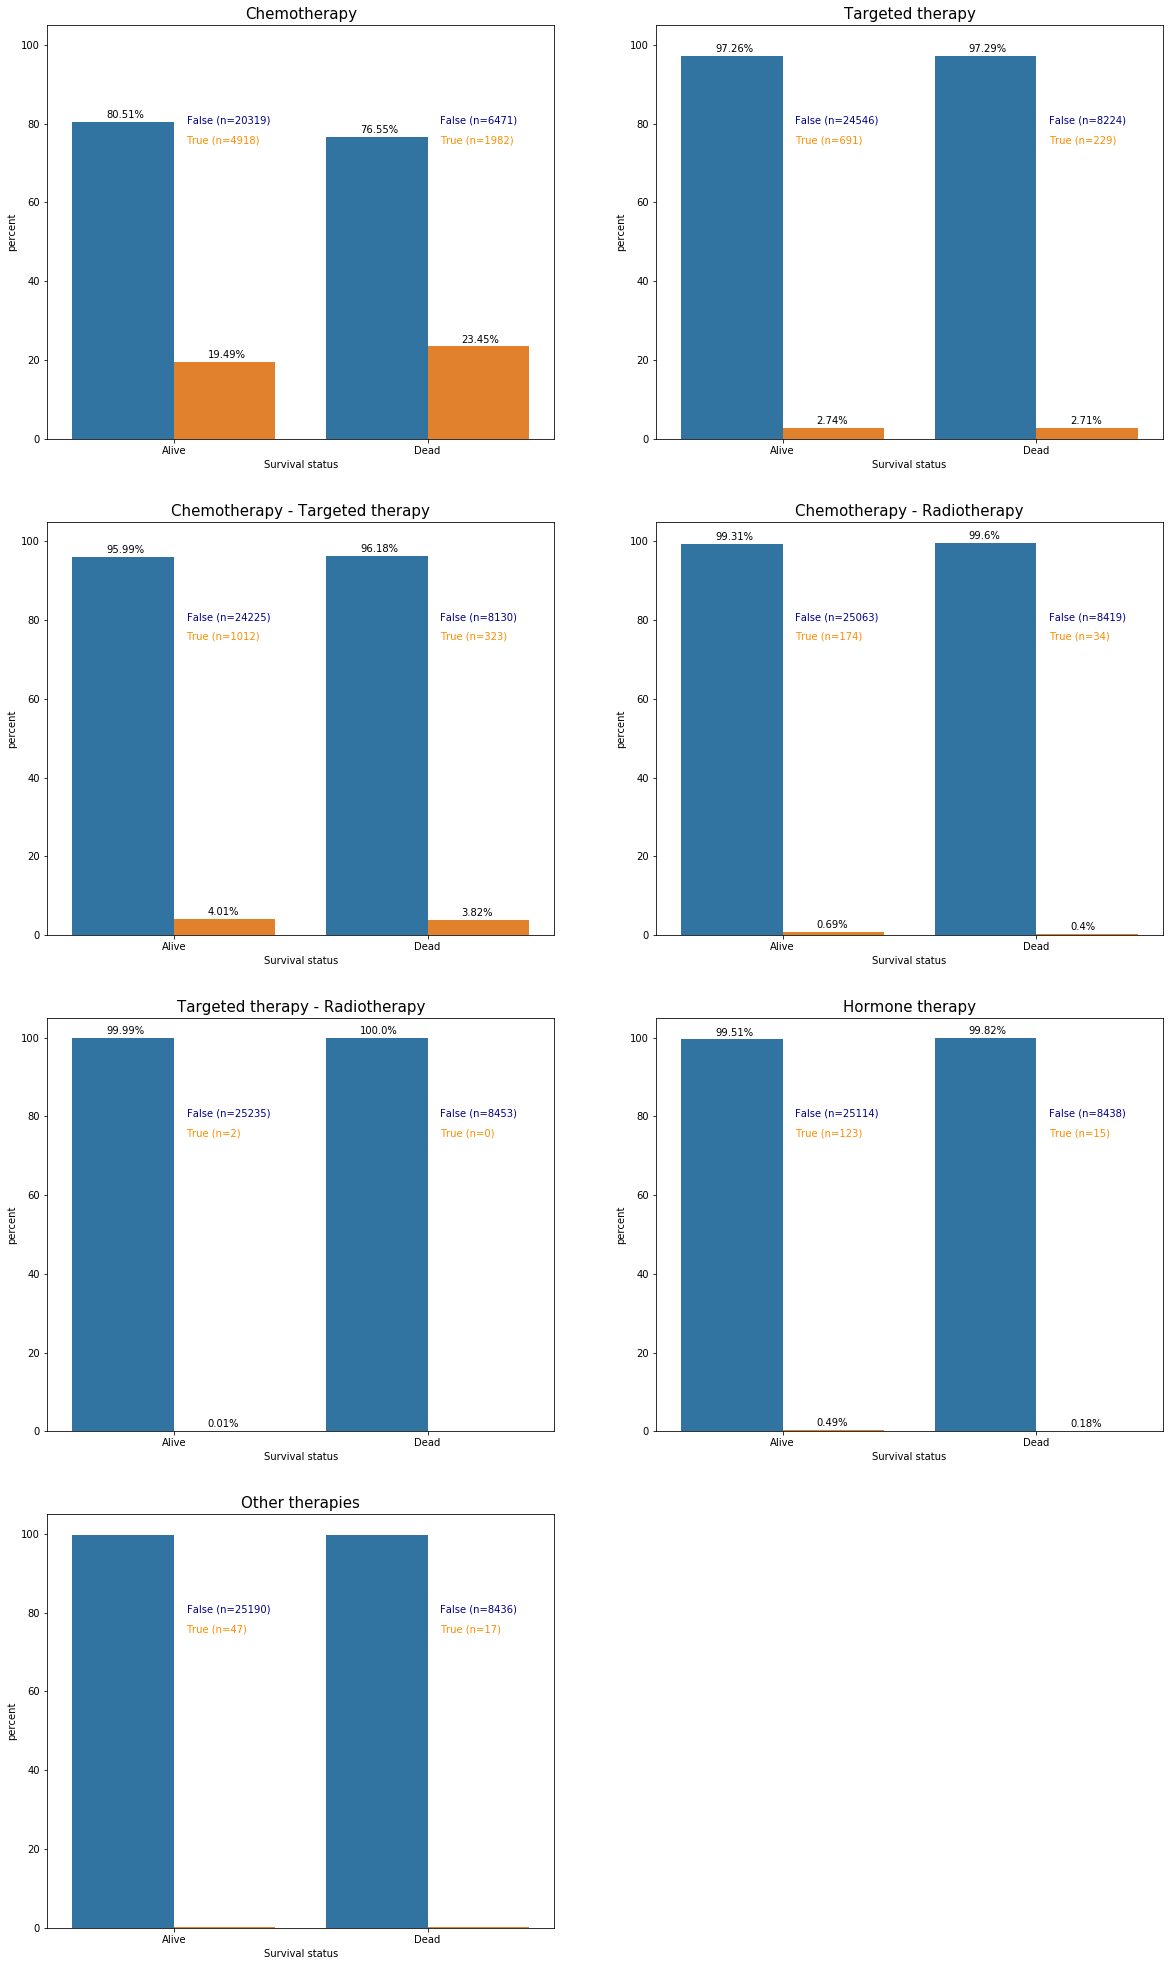

In [224]:
f, axes = plt.subplots(4, 2, figsize=(20, 35))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CHEMOTHERAPY2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Chemotherapy', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=20319)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=4918)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=6471)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=1982)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'TARGETED2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Targeted therapy', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=24546)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=691)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=8224)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=229)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'CHEM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Chemotherapy - Targeted therapy', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=24225)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=1012)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=8130)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=323)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CHEM_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Chemotherapy - Radiotherapy', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=25063)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=174)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=8419)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=34)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'TARG_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Targeted therapy - Radiotherapy', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=25235)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=8453)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=0)", horizontalalignment='left', size='medium', color='darkorange')

    
#Figure 6
x, y = 'DEAD', 'HORMONE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Hormone therapy', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)
    
axes[2,1].text(0.05, 80, "False (n=25114)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=123)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=8438)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=15)", horizontalalignment='left', size='medium', color='darkorange')   


#Figure 9
x, y = 'DEAD', 'OTHER2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Other therapies', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6) 
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=25190)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=47)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=8436)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=17)", horizontalalignment='left', size='medium', color='darkorange')
     
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [225]:
contingency = pd.crosstab(df['DEAD'], df['CHEMOTHERAPY2'])
contingency

CHEMOTHERAPY2,0,1
DEAD,,
0,20319,4918
1,6471,1982


In [226]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.551549394401592e-15


In [227]:
contingency = pd.crosstab(df['DEAD'], df['TARGETED2'])
contingency

TARGETED2,0,1
DEAD,,
0,24546,691
1,8224,229


In [228]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9181413053575084


In [229]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_TARG2'])
contingency

CHEM_TARG2,0,1
DEAD,,
0,24225,1012
1,8130,323


In [230]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.46042066407680027


In [231]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO2'])
contingency

CHEM_RADIO2,0,1
DEAD,,
0,25063,174
1,8419,34


In [232]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.004543094442757092


In [233]:
contingency = pd.crosstab(df['DEAD'], df['TARG_RADIO2'])
contingency

TARG_RADIO2,0,1
DEAD,,
0,25235,2
1,8453,0


In [234]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9976436333889455


In [235]:
contingency = pd.crosstab(df['DEAD'], df['HORMONE2'])
contingency

HORMONE2,0,1
DEAD,,
0,25114,123
1,8438,15


In [236]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.000167921087099941


In [237]:
contingency = pd.crosstab(df['DEAD'], df['OTHER2'])
contingency

OTHER2,0,1
DEAD,,
0,25190,47
1,8436,17


In [238]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.898481776193374


In [239]:
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,10001901,M,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
